In [70]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from env.area import Area

# Set seaborn theme globally
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)


def plot_histograms(projects, area_pickle_file):
    contributors_per_project(projects)
    success_rate_over_time(projects)
    quality_metrics_over_time(projects)
    collab_metrics_over_time(projects)
    projects_per_contributor(projects)
    prestige_per_project(projects)
    completion_per_project(projects)
    quality_per_project(projects)
    topic_area_per_project(projects, area_pickle_file)


def contributors_per_project(projects):
    num_contributors = [len(p["contributors"]) for p in projects]

    plt.figure(figsize=(8, 5))
    sns.histplot(num_contributors, bins=range(1, max(num_contributors) + 2), kde=False, discrete=True)
    plt.xlabel("Number of Contributors")
    plt.ylabel("Number of Projects")
    plt.title("Distribution of Contributors per Project")
    plt.tight_layout()
    plt.show()


def projects_per_contributor(projects):
    all_contributors = []
    for p in projects:
        all_contributors.extend(p["contributors"])

    author_counts = Counter(all_contributors)
    papers_per_author = list(author_counts.values())

    plt.figure(figsize=(8, 5))
    sns.histplot(papers_per_author, bins=range(1, max(papers_per_author) + 2), kde=False, discrete=True)
    plt.xlabel("Number of Papers per Author")
    plt.ylabel("Number of Authors")
    plt.title("Authors by Number of Papers")
    plt.tight_layout()
    plt.show()


def prestige_per_project(projects):
    prestige_categories = [int(p["project_id"].split("-")[1]) % 3 for p in projects]

    plt.figure(figsize=(6, 4))
    sns.histplot(prestige_categories, bins=range(1, max(prestige_categories)), kde=False, discrete=True)
    plt.xlabel("Prestige Category (mod 3)")
    plt.ylabel("Number of Projects")
    plt.title("Projects per Prestige Category")
    plt.tight_layout()
    plt.show()


def completion_per_project(projects):
    completion = [(p["current_effort"] / p["required_effort"]) * 100 for p in projects]

    plt.figure(figsize=(8, 5))
    sns.histplot(completion, bins=range(0, 110, 10), kde=False, discrete=True)
    plt.xlabel("Completion (%)")
    plt.ylabel("Number of Projects")
    plt.title("Distribution of Project Completion")
    plt.tight_layout()
    plt.show()


def quality_per_project(projects):
    quality_scores = [p["quality_score"] for p in projects]

    plt.figure(figsize=(8, 5))
    sns.histplot(quality_scores, bins=[i/10 for i in range(0, 11)], kde=False)
    plt.xlabel("Quality Score")
    plt.ylabel("Number of Projects")
    plt.title("Distribution of Project Quality Scores")
    plt.tight_layout()
    plt.show()

def success_rate_over_time(projects):
    """
    Plots the cumulative success rate of projects (finished / started)
    over time, using 'start_time' and 'finished' from the projects list.
    """
    # Extract (start_time, finished) for each project
    events = [(p["start_time"], p["finished"], p["final_reward"]) for p in projects]

    # Sort by start time
    events.sort(key=lambda x: x[0])

    time_steps = []
    success_rates = []

    finished = 0
    successful = 0

    for t, is_finished, score in events:
        if is_finished:
            finished += 1
            if score > 0:
                successful += 1
        success_rate = successful/ finished if finished > 0 else 0
        time_steps.append(t)
        success_rates.append(success_rate)

    # Plot
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=time_steps, y=success_rates)
    plt.xlabel("Time Step")
    plt.ylabel("Success Rate")
    plt.title("Project Success Rate Over Time")
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

def quality_metrics_over_time(projects):
    """
    Plots quality score, number of citations, current effort,
    and novelty over project start_time in one line plot.
    """
    # Sort projects by start time
    projects_sorted = sorted(projects, key=lambda p: p["start_time"])

    times = [p["start_time"] for p in projects_sorted]
    quality = [p["quality_score"] for p in projects_sorted]
    novelty = [p["novelty"] for p in projects_sorted]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=times, y=quality, label="Quality Score")
    sns.lineplot(x=times, y=novelty, label="Novelty")

    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.title("Project Metrics Over Time")
    plt.legend()
    # plt.tight_layout()
    plt.show()

def collab_metrics_over_time(projects):
    """
    Plots quality score, number of citations, current effort,
    and novelty over project start_time in one line plot.
    """
    # Sort projects by start time
    projects_sorted = sorted(projects, key=lambda p: p["start_time"])

    times = [p["start_time"] for p in projects_sorted]
    effort = [p["current_effort"] for p in projects_sorted]
    citations = [len(p["citations"]) for p in projects_sorted]

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=times, y=effort, label="Current Effort")
    sns.lineplot(x=times, y=citations, label="Citations")

    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.title("Project Metrics Over Time")
    plt.legend()
    # plt.tight_layout()
    plt.show()


def topic_area_per_project(projects, area_pickle_file):
    area = Area.load(area_pickle_file)
    area.visualize(sampled_points=[p["kene"] for p in projects])


In [54]:
# Load projects list from JSON file
with open("../log/policy_all_careerist_projects.json", "r") as f:
    all_careerist_projects = json.load(f)


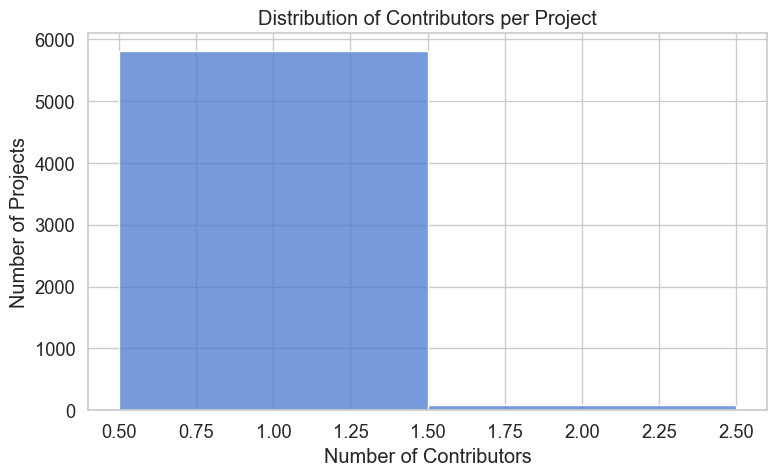

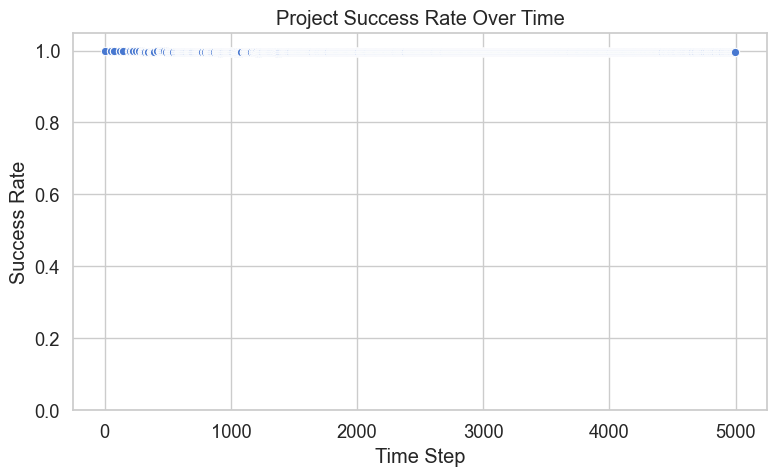

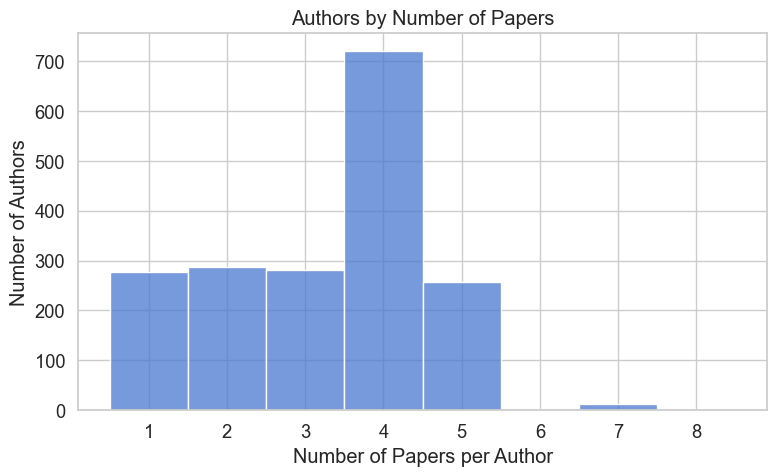

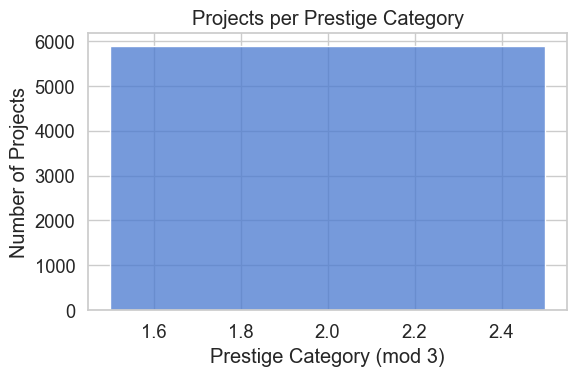

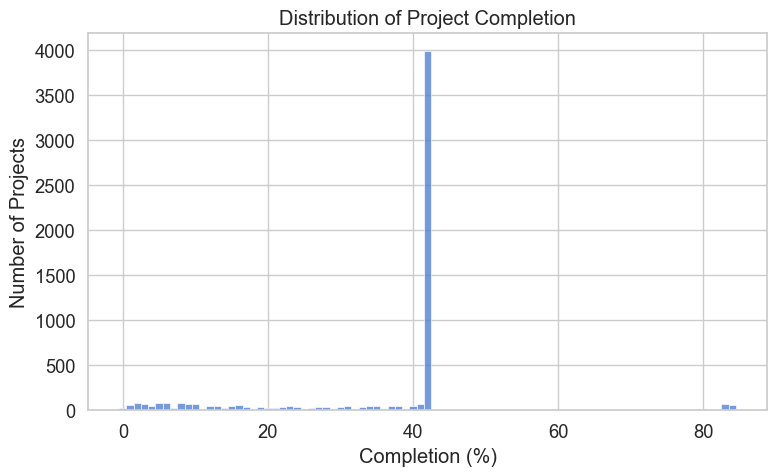

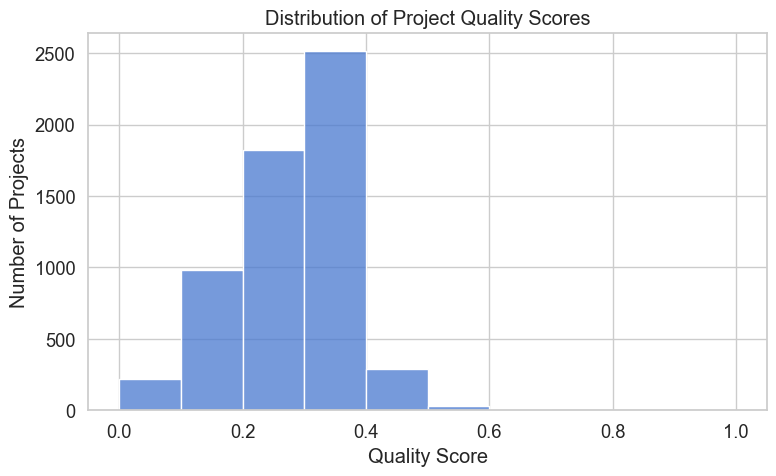

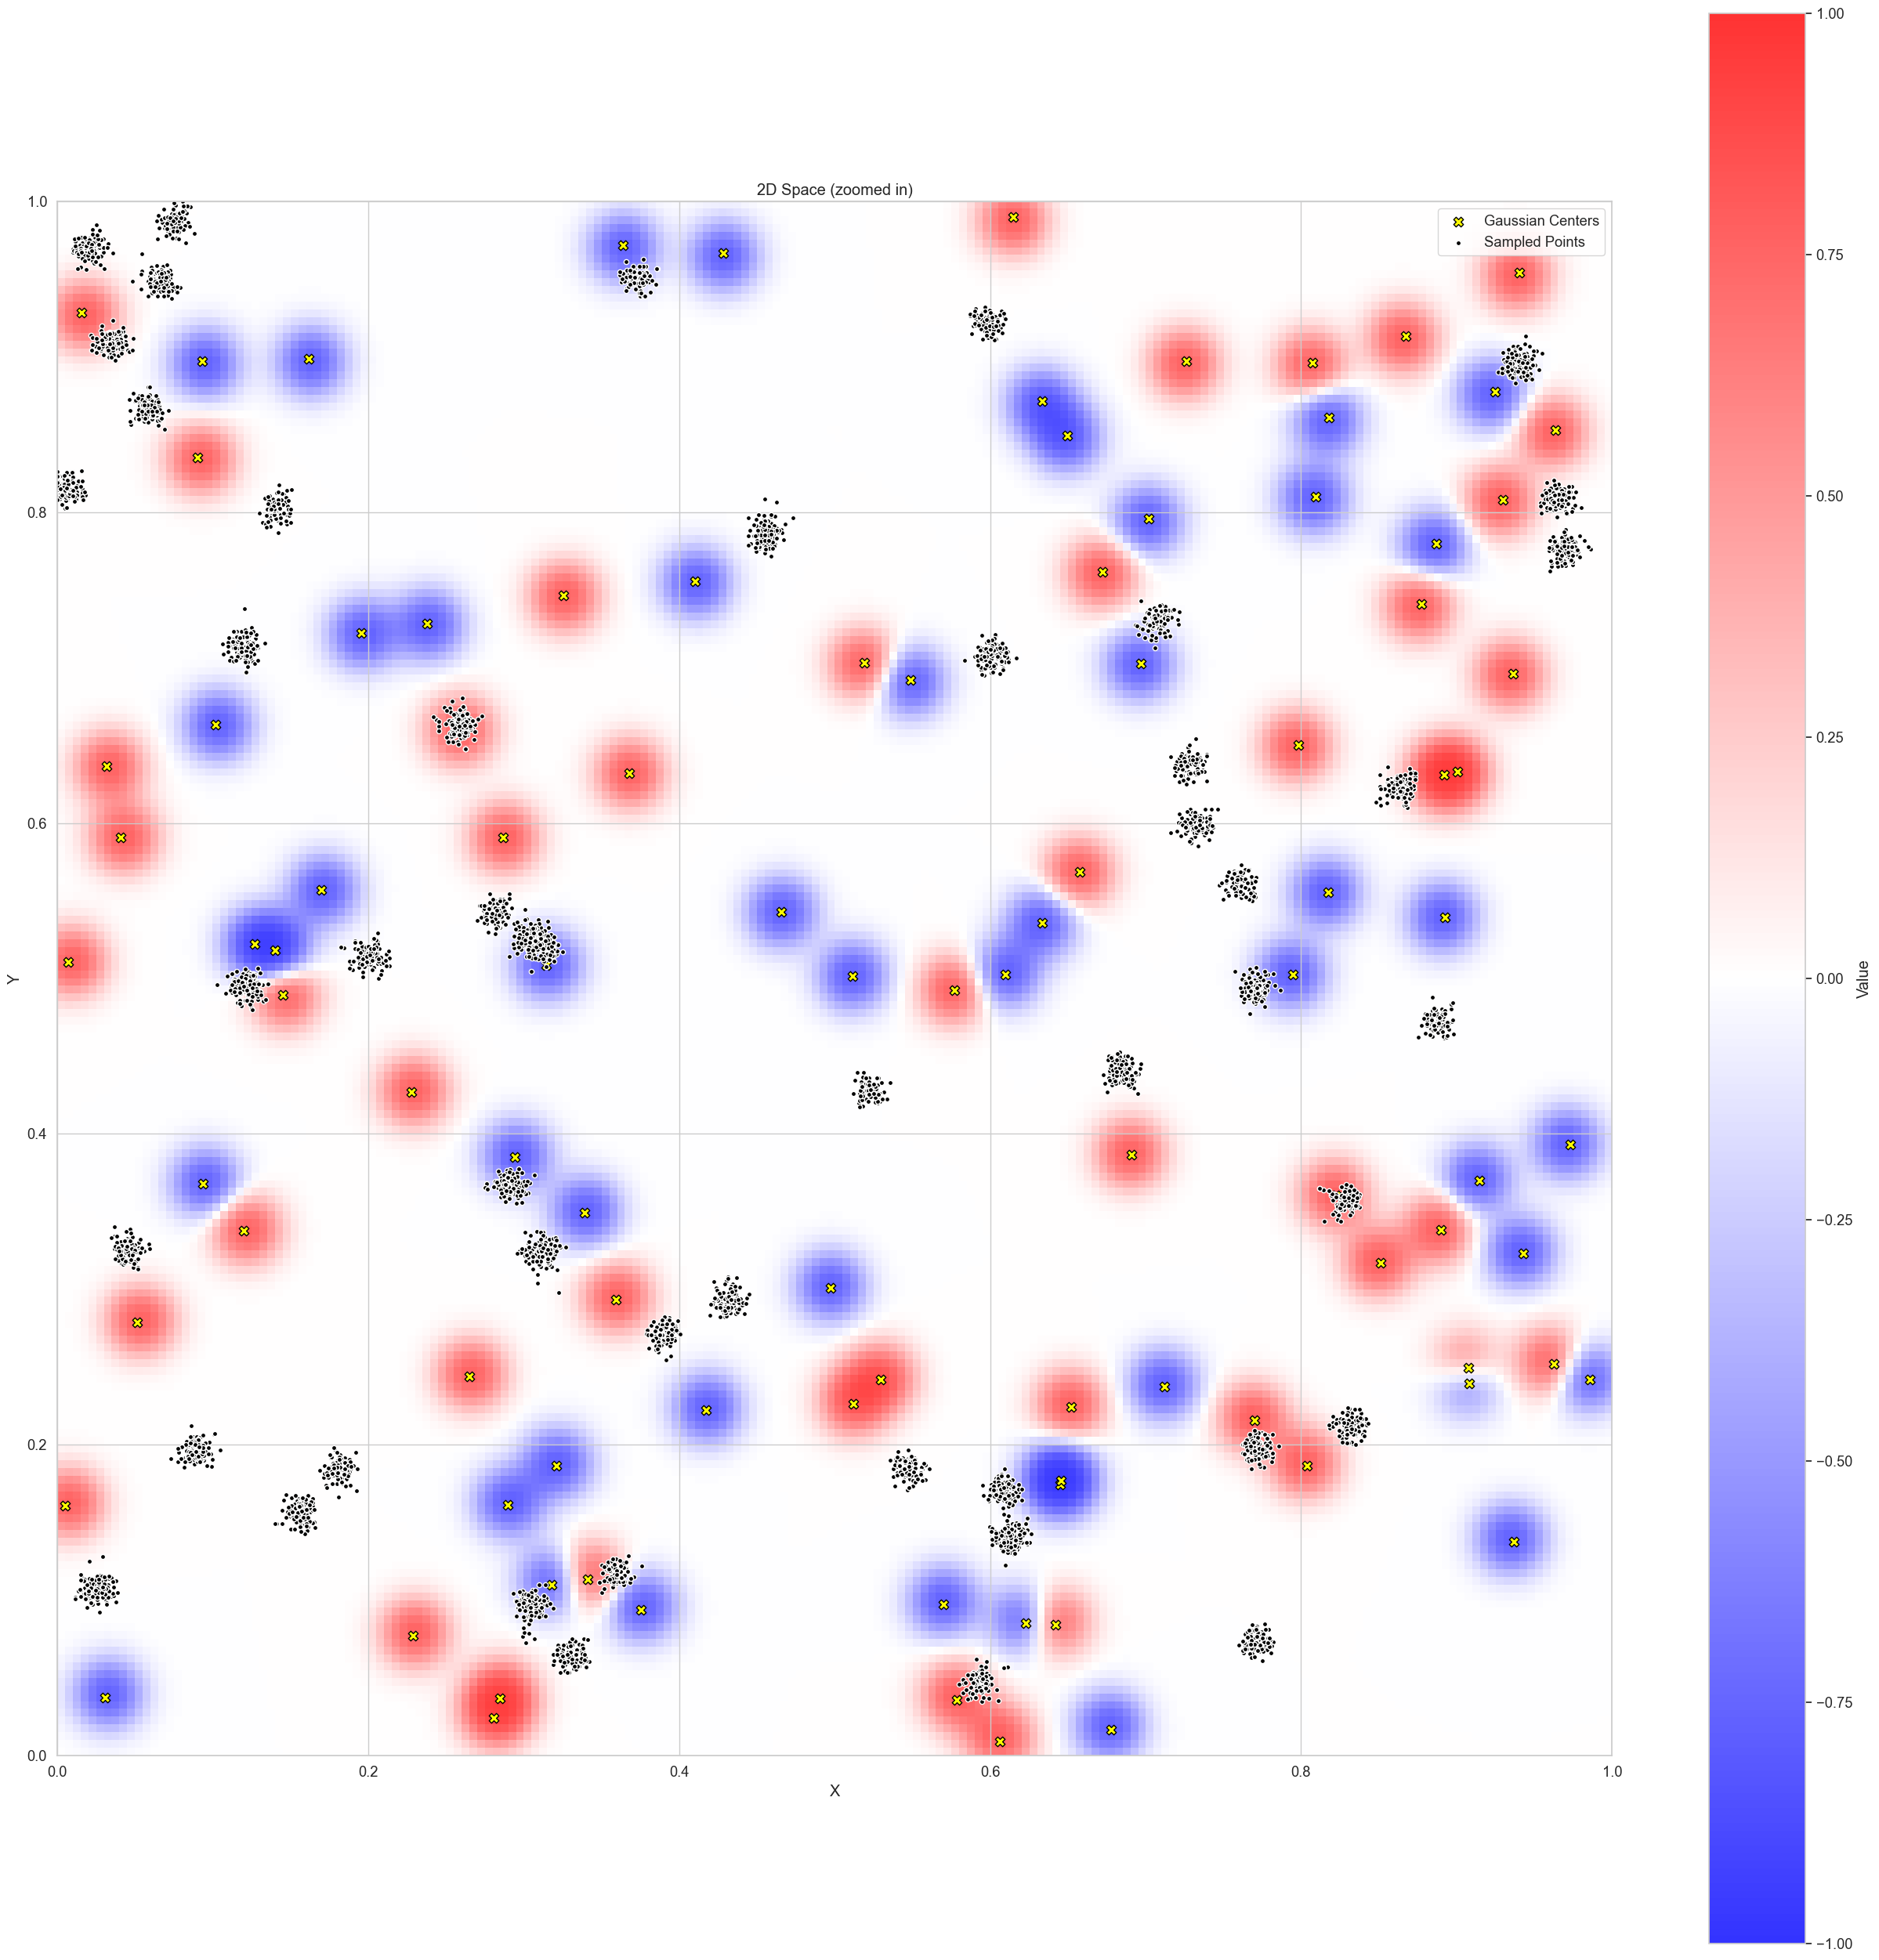

In [55]:
plot_histograms(all_careerist_projects, "../log/policy_all_careerist_area.pickle")

In [17]:
# Load projects list from JSON file
with open("../log/policy_all_orthodox_projects.json", "r") as f:
    all_orthodox_projects = json.load(f)

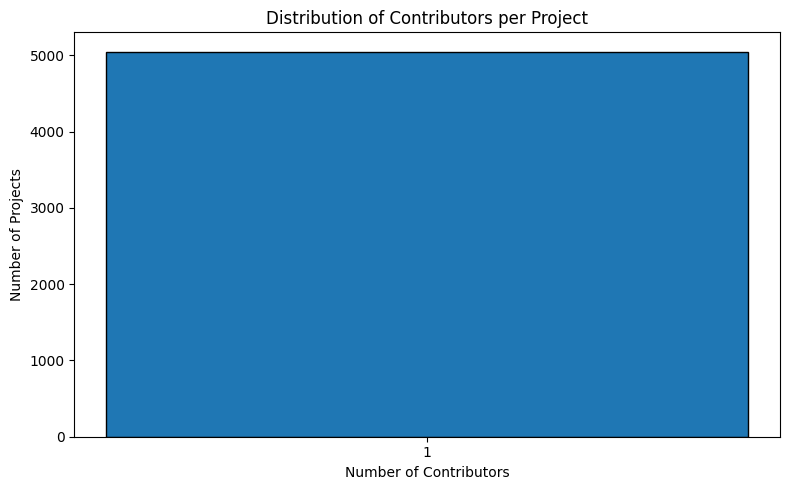

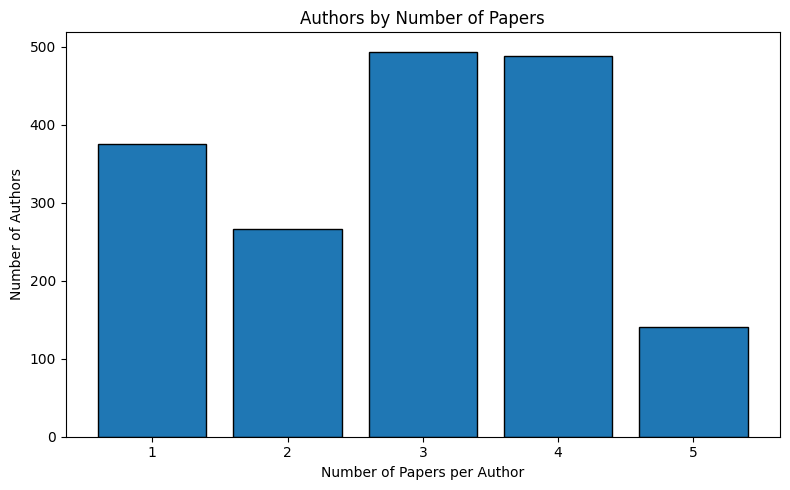

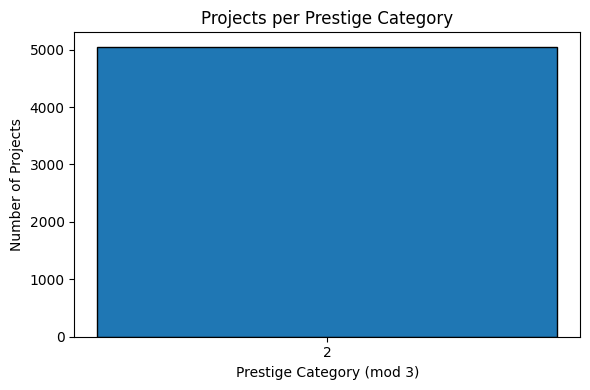

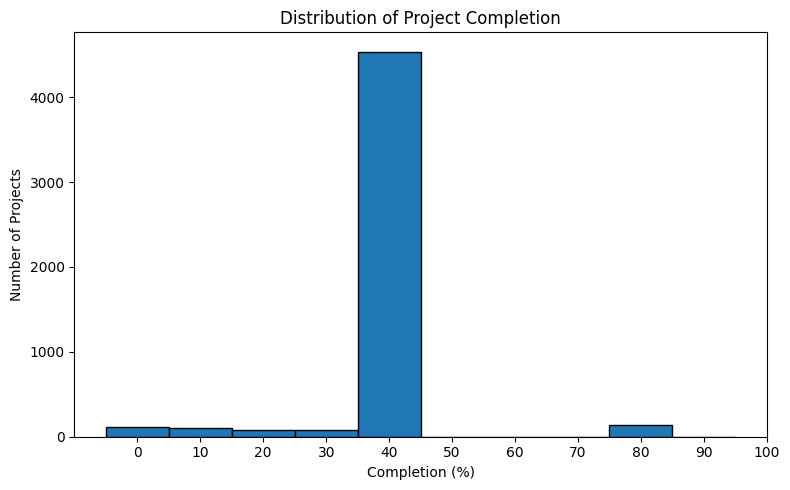

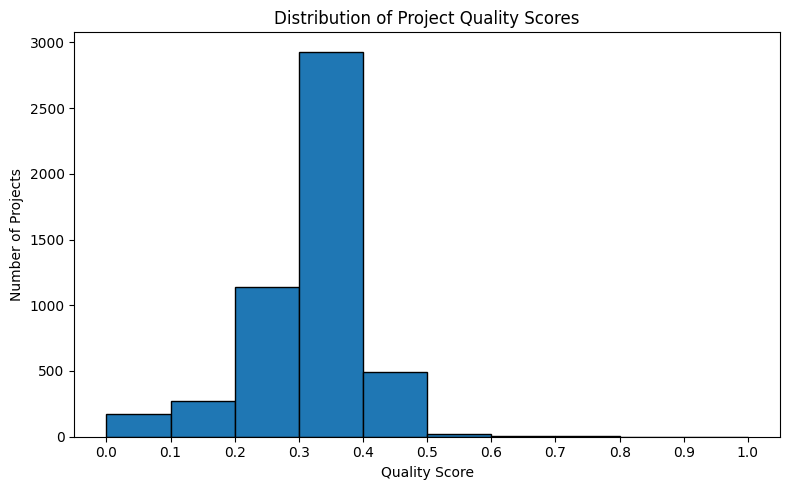

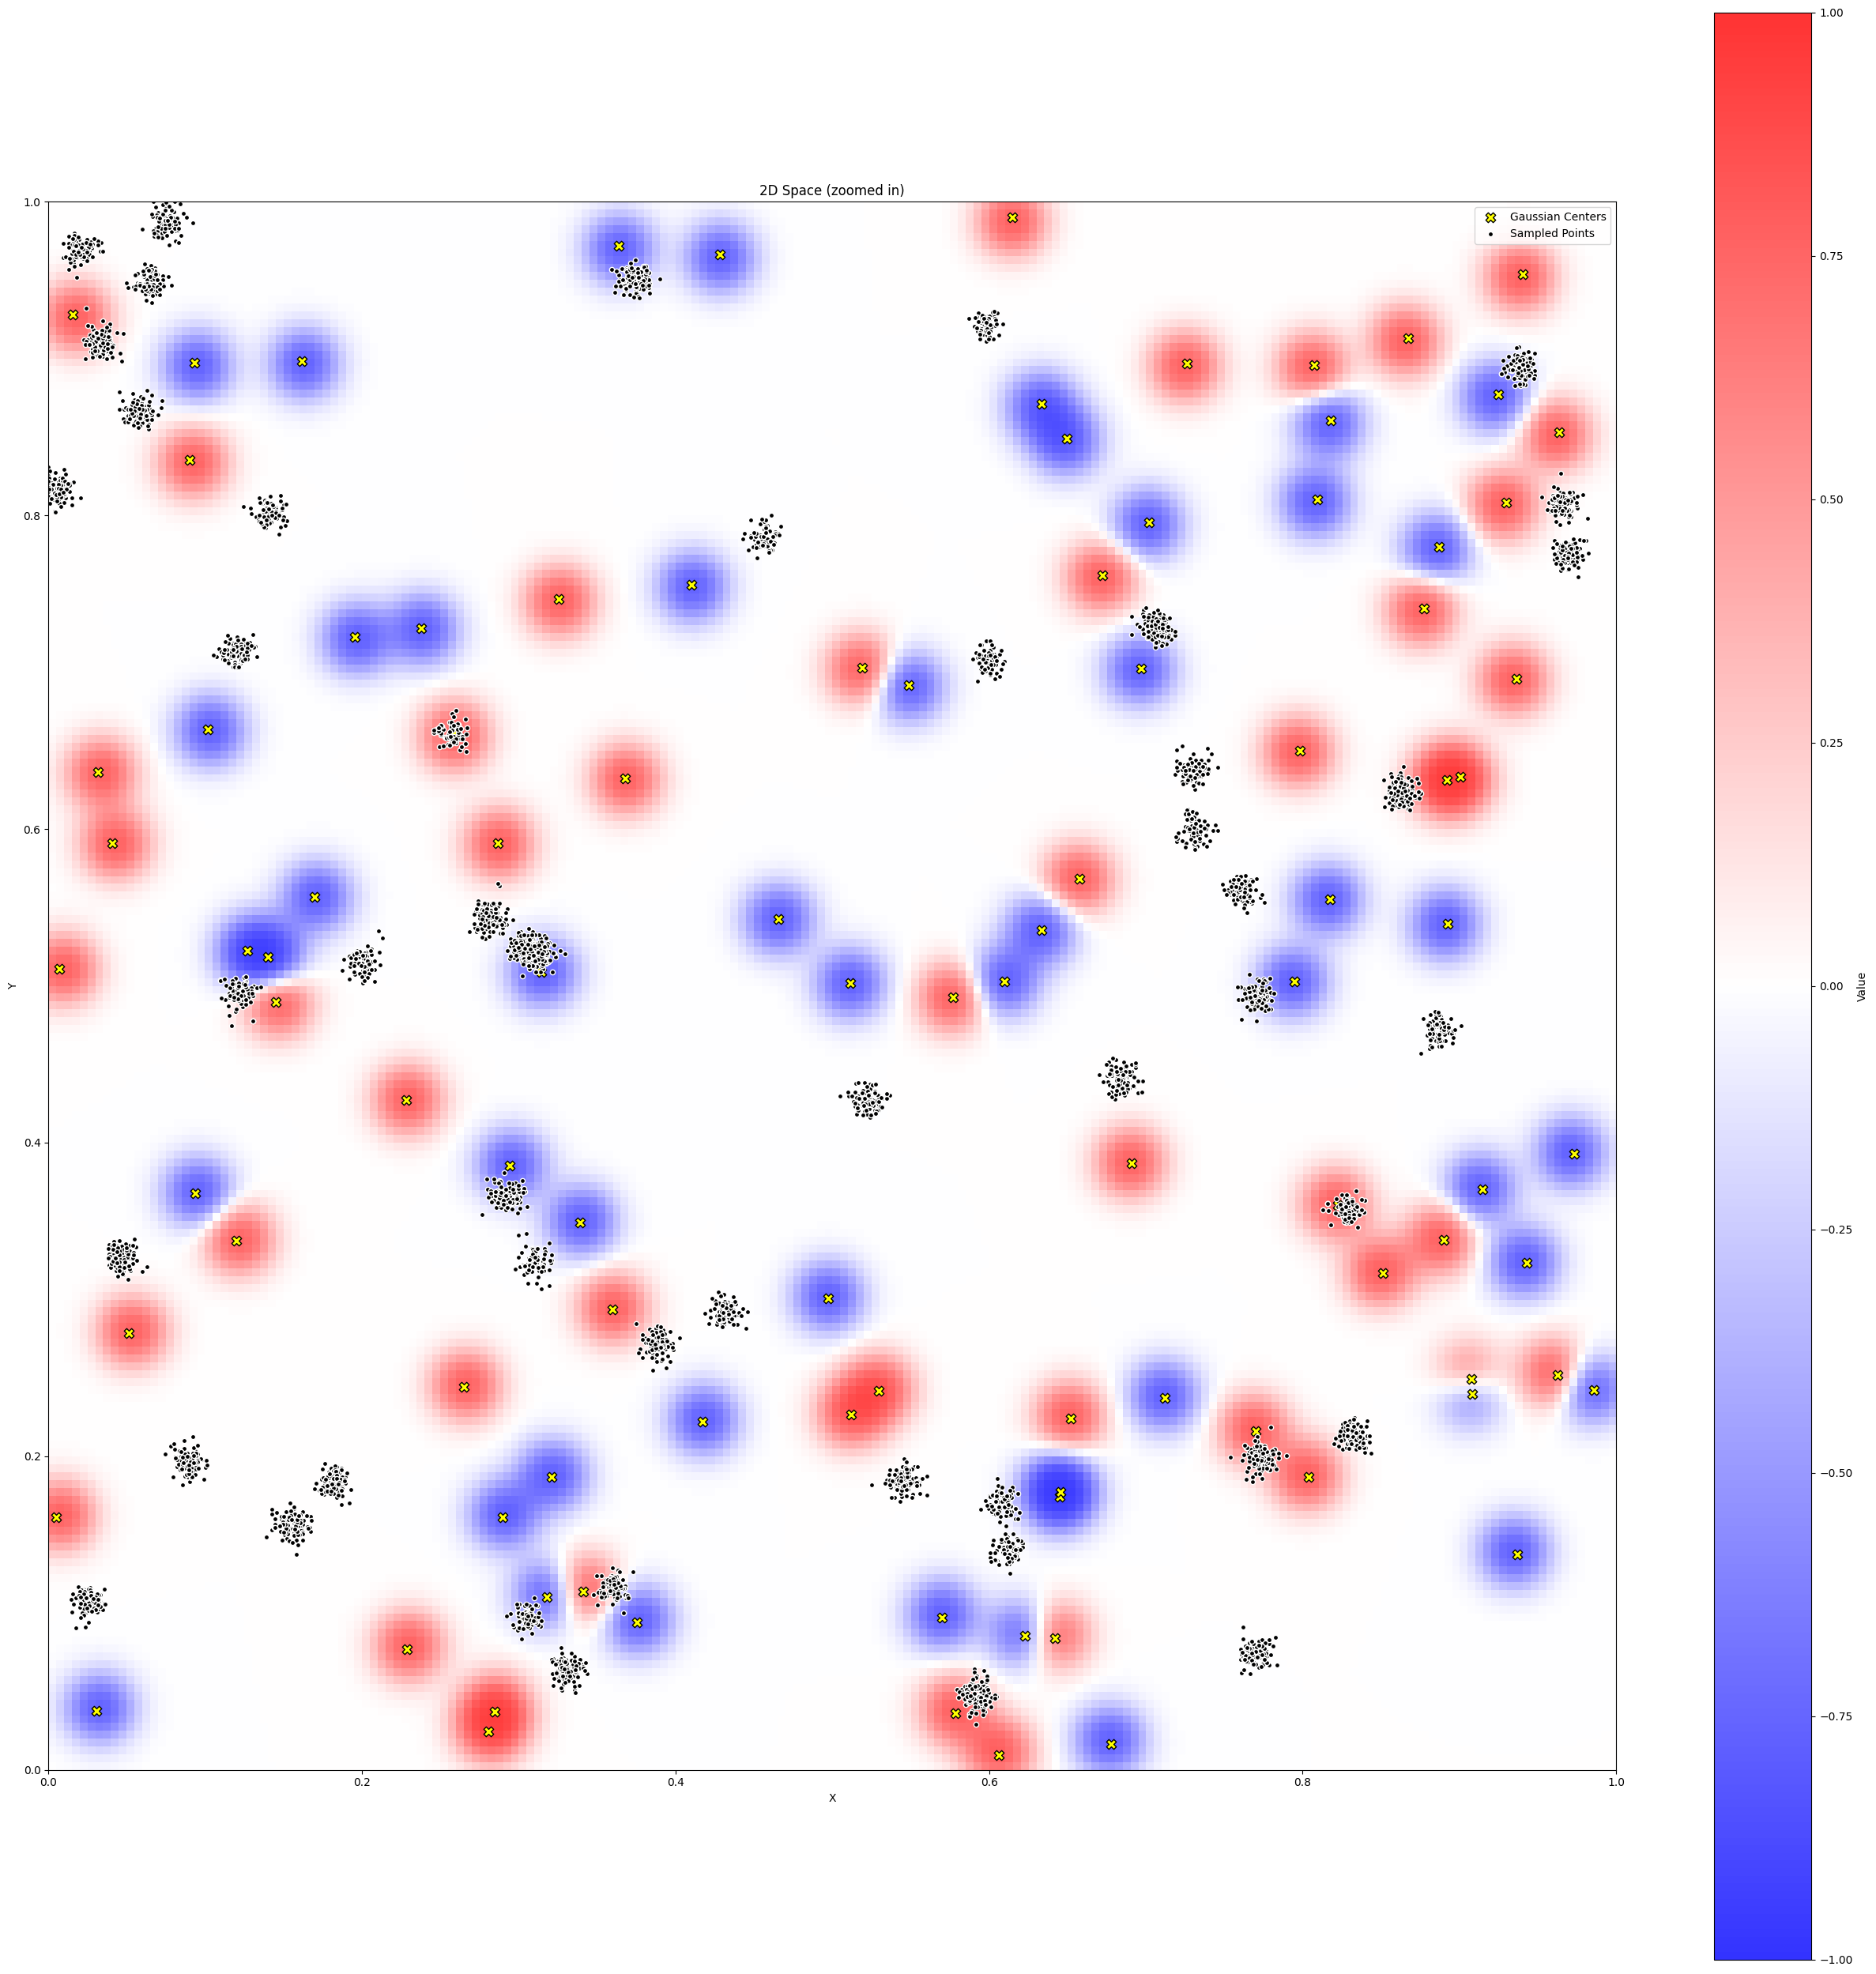

In [18]:
plot_histograms(all_orthodox_projects, "../log/policy_all_orthodox_area.pickle")

In [19]:

# Load projects list from JSON file
with open("../log/policy_all_mass_producer_projects.json", "r") as f:
    all_mass_producer_projects = json.load(f)

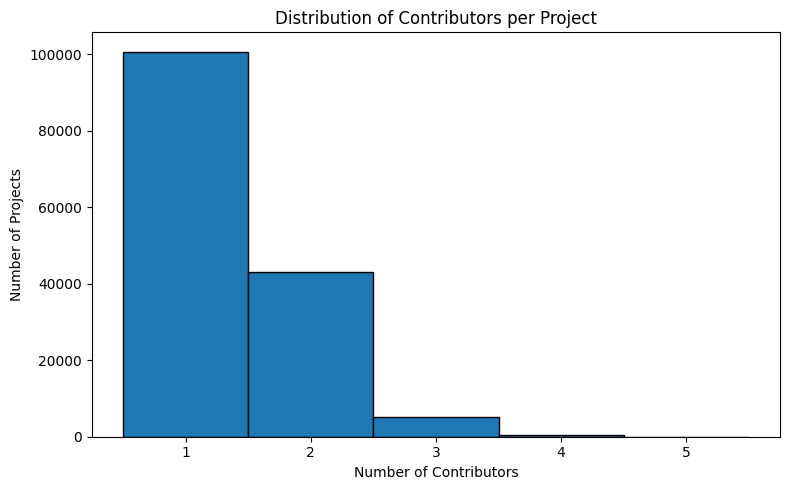

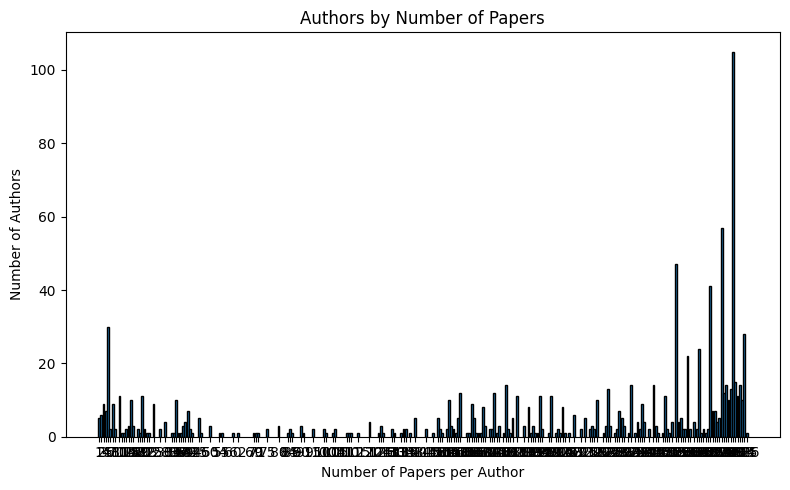

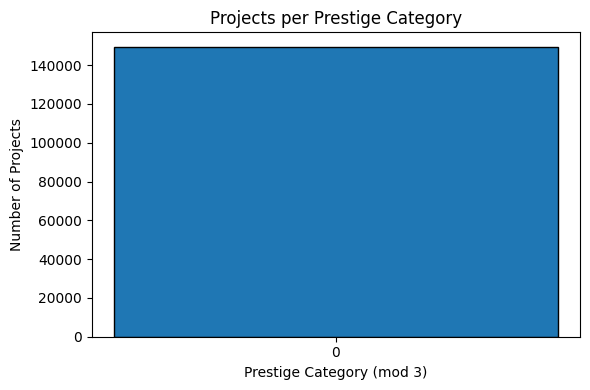

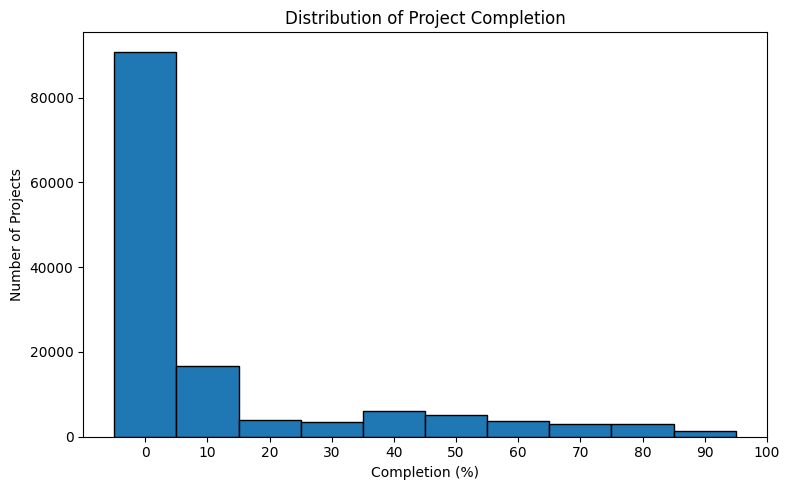

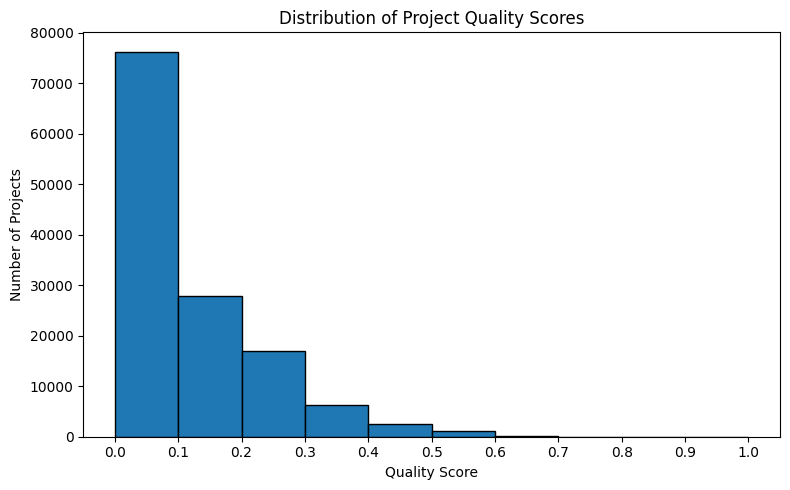

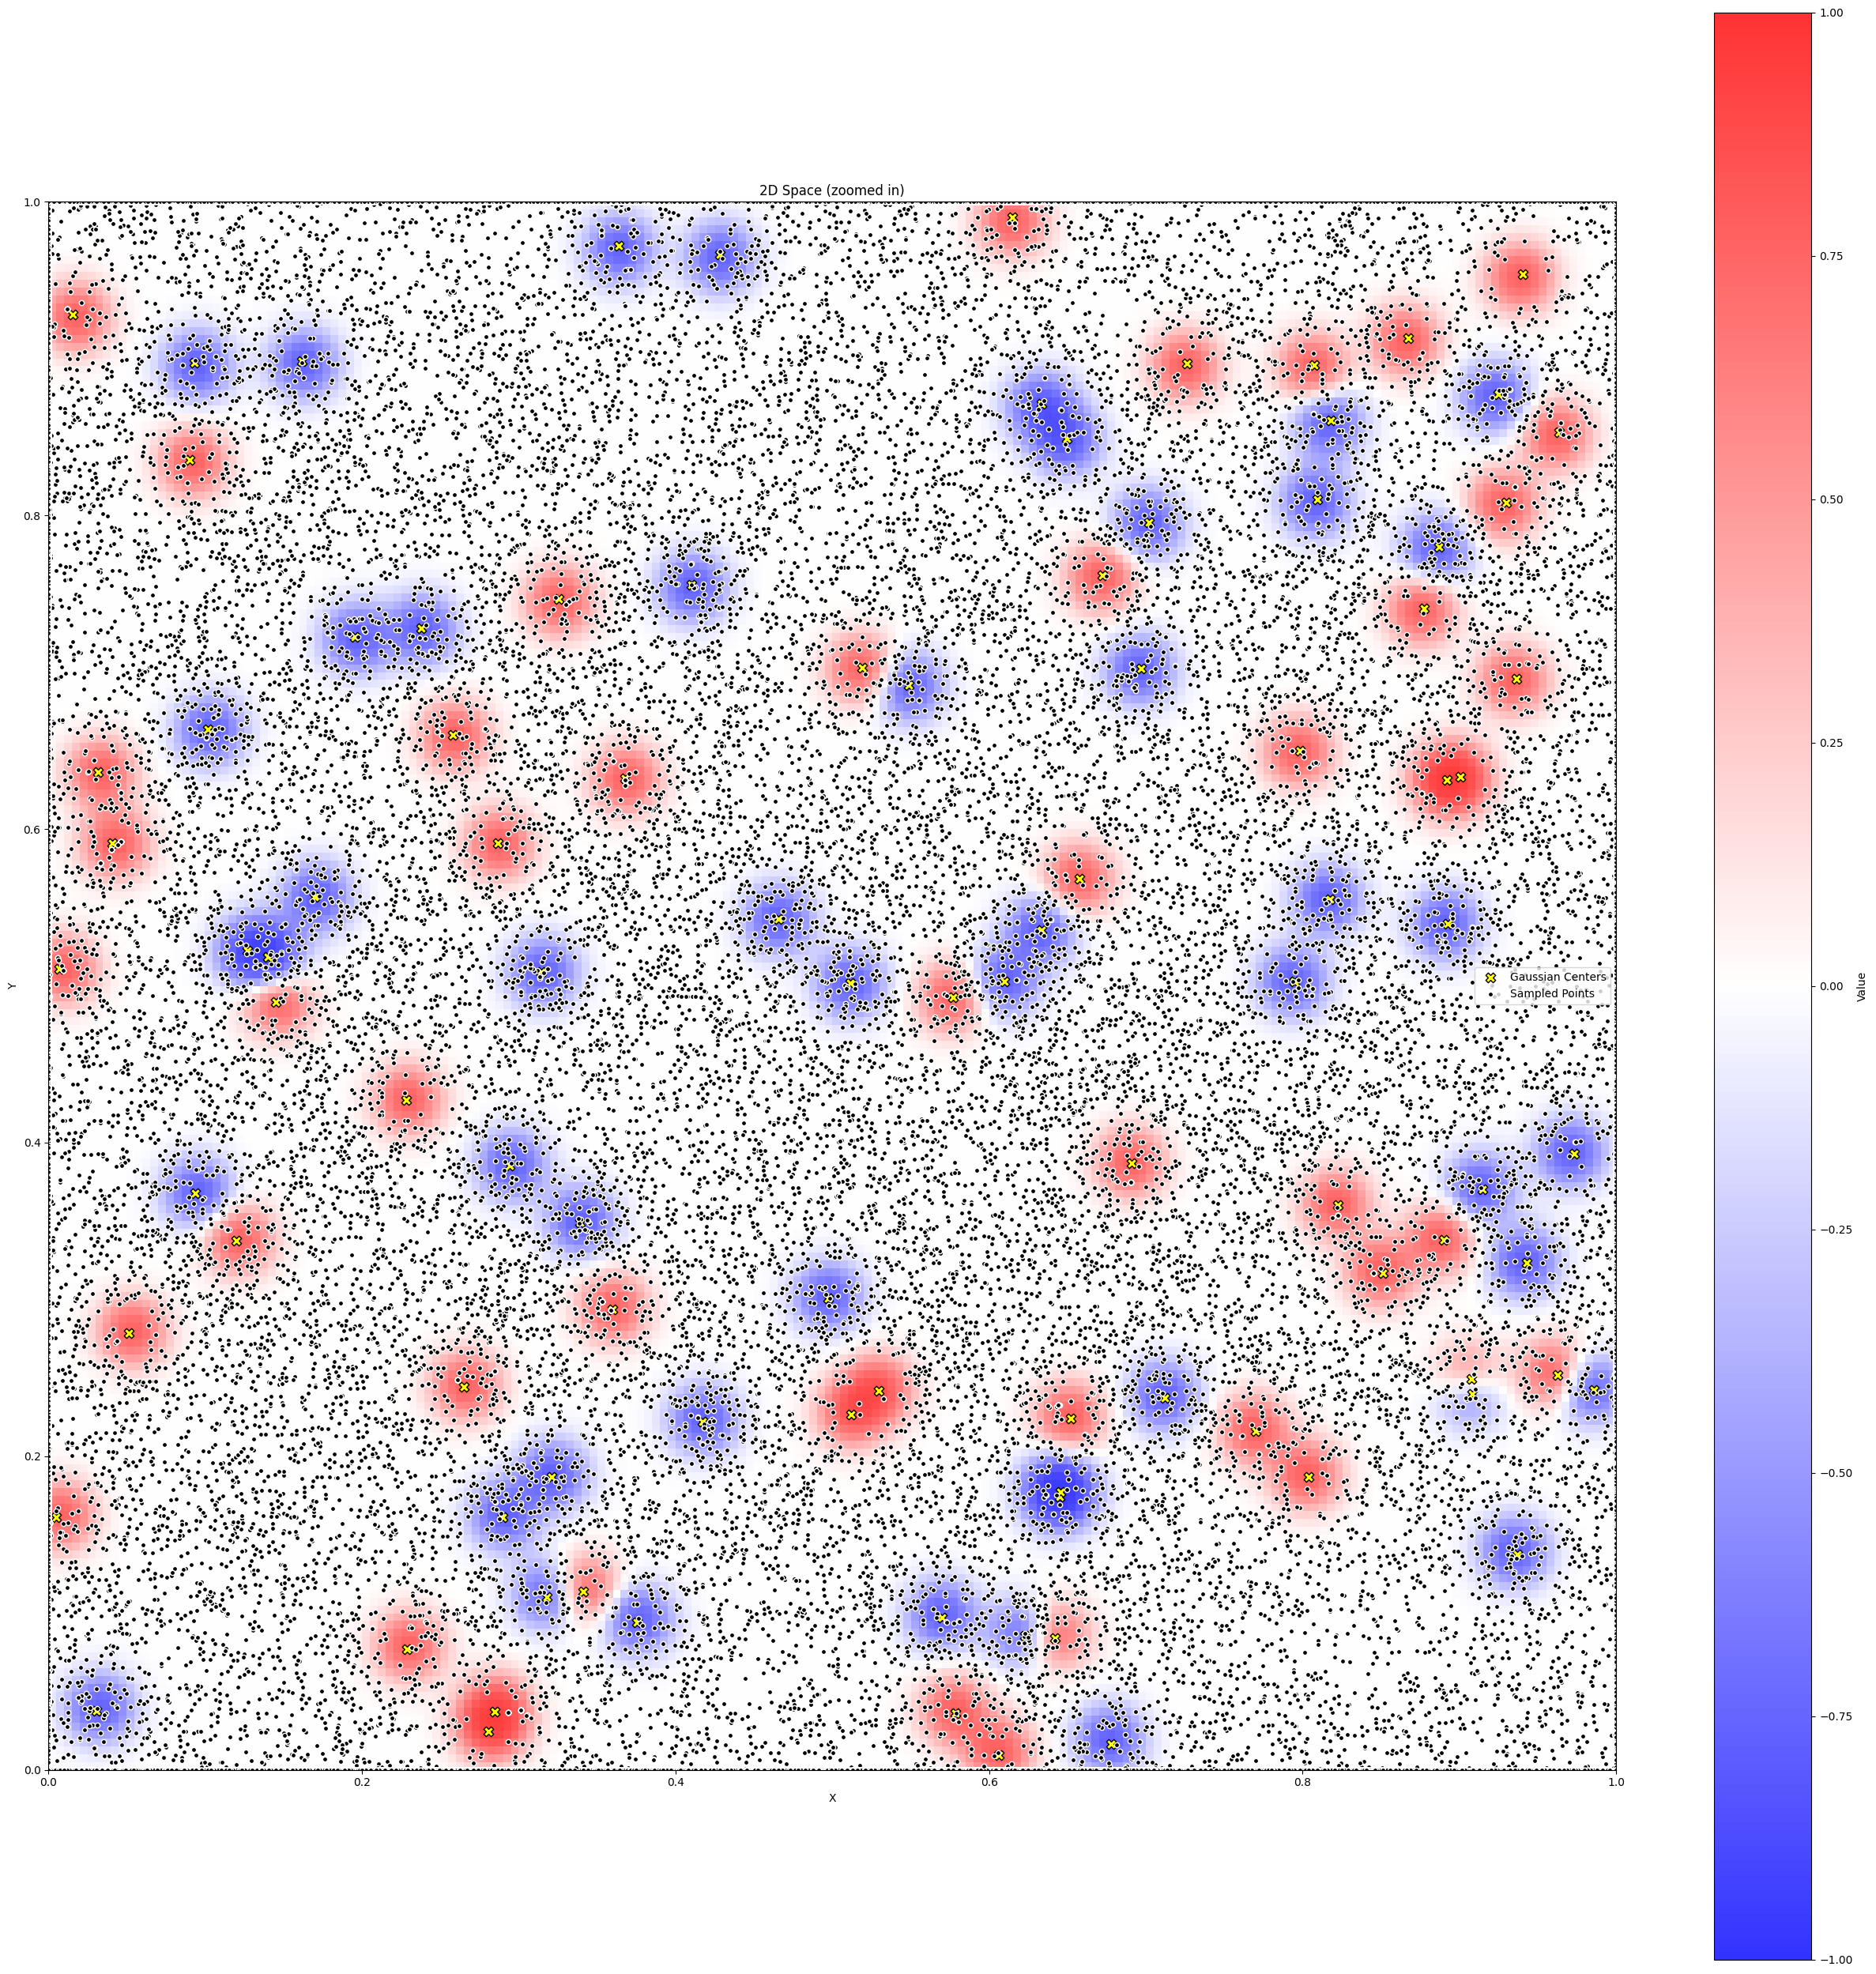

In [20]:
plot_histograms(all_mass_producer_projects, "../log/policy_all_mass_producer_area.pickle")

In [71]:

# Load projects list from JSON file
with open("../log/policy_balanced_projects.json", "r") as f:
    balanced_projects = json.load(f)

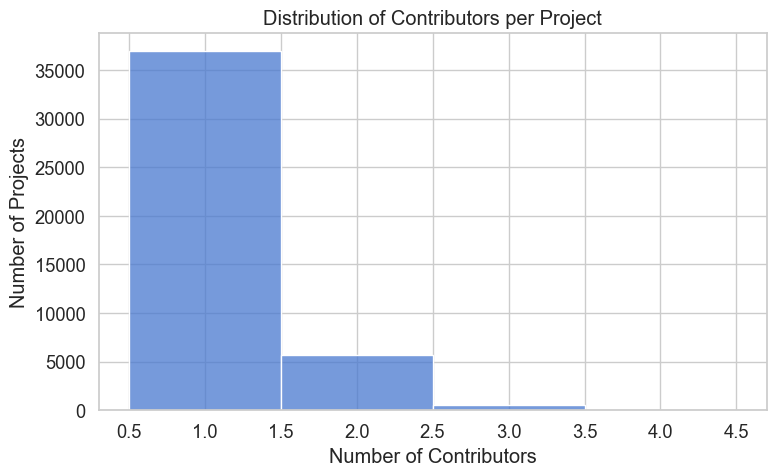

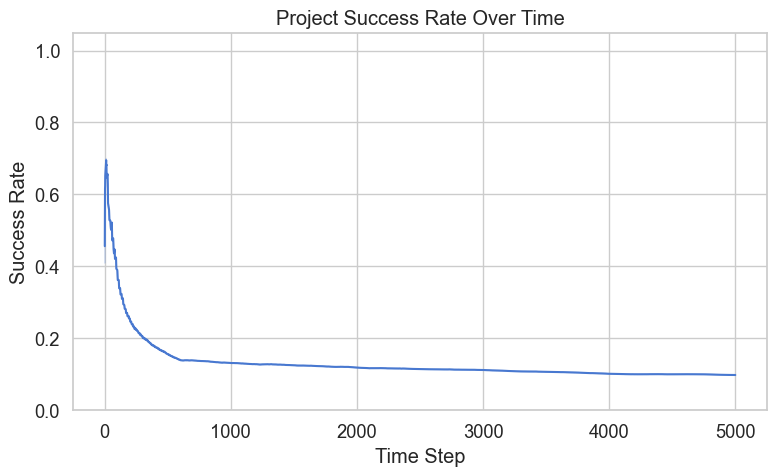

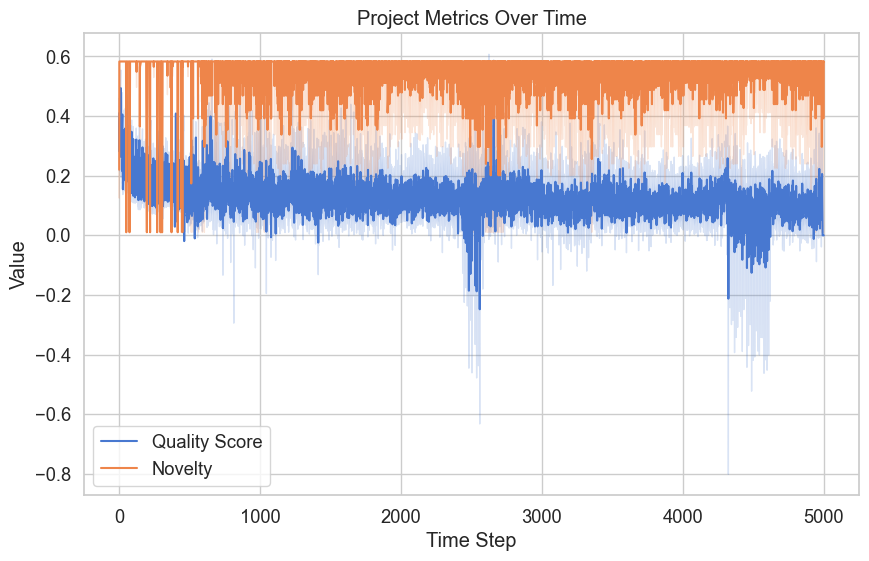

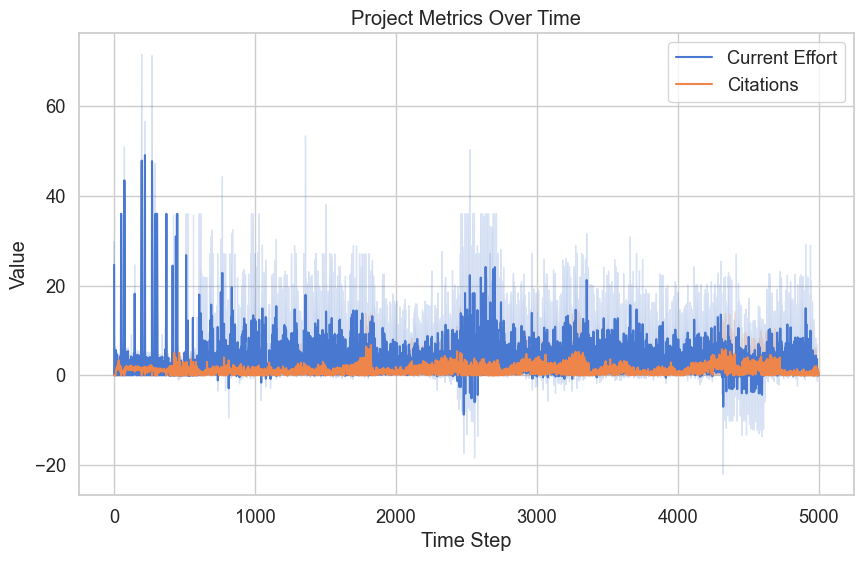

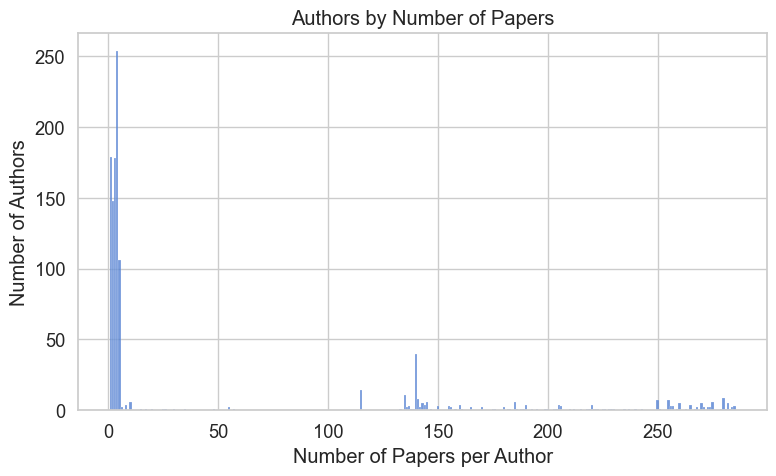

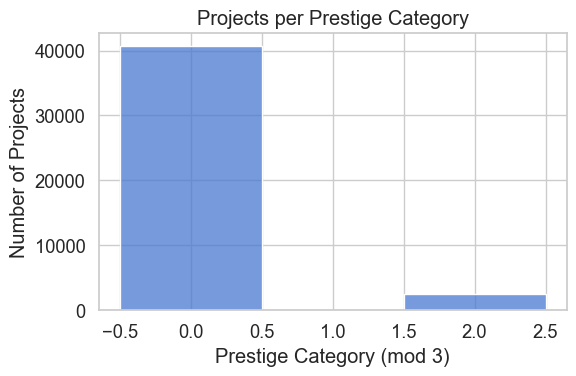

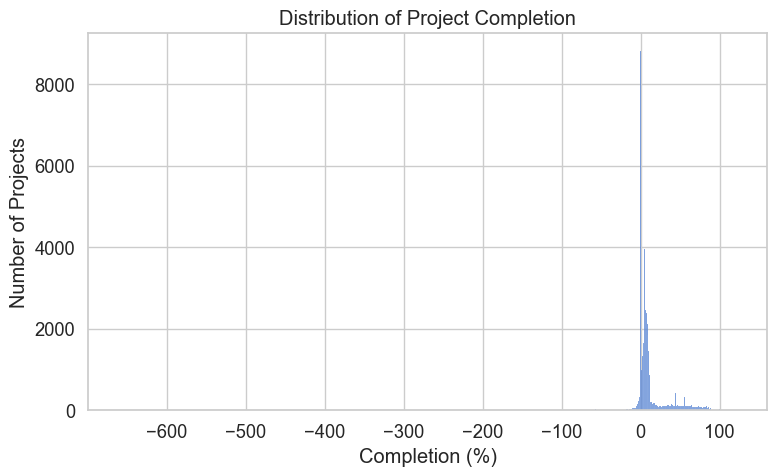

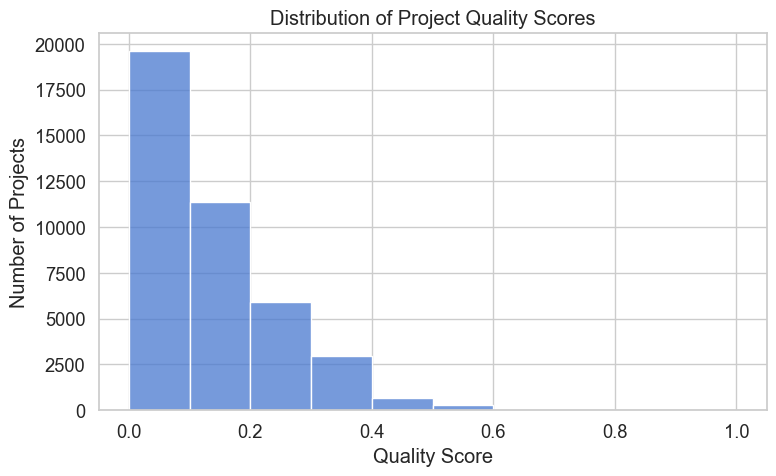

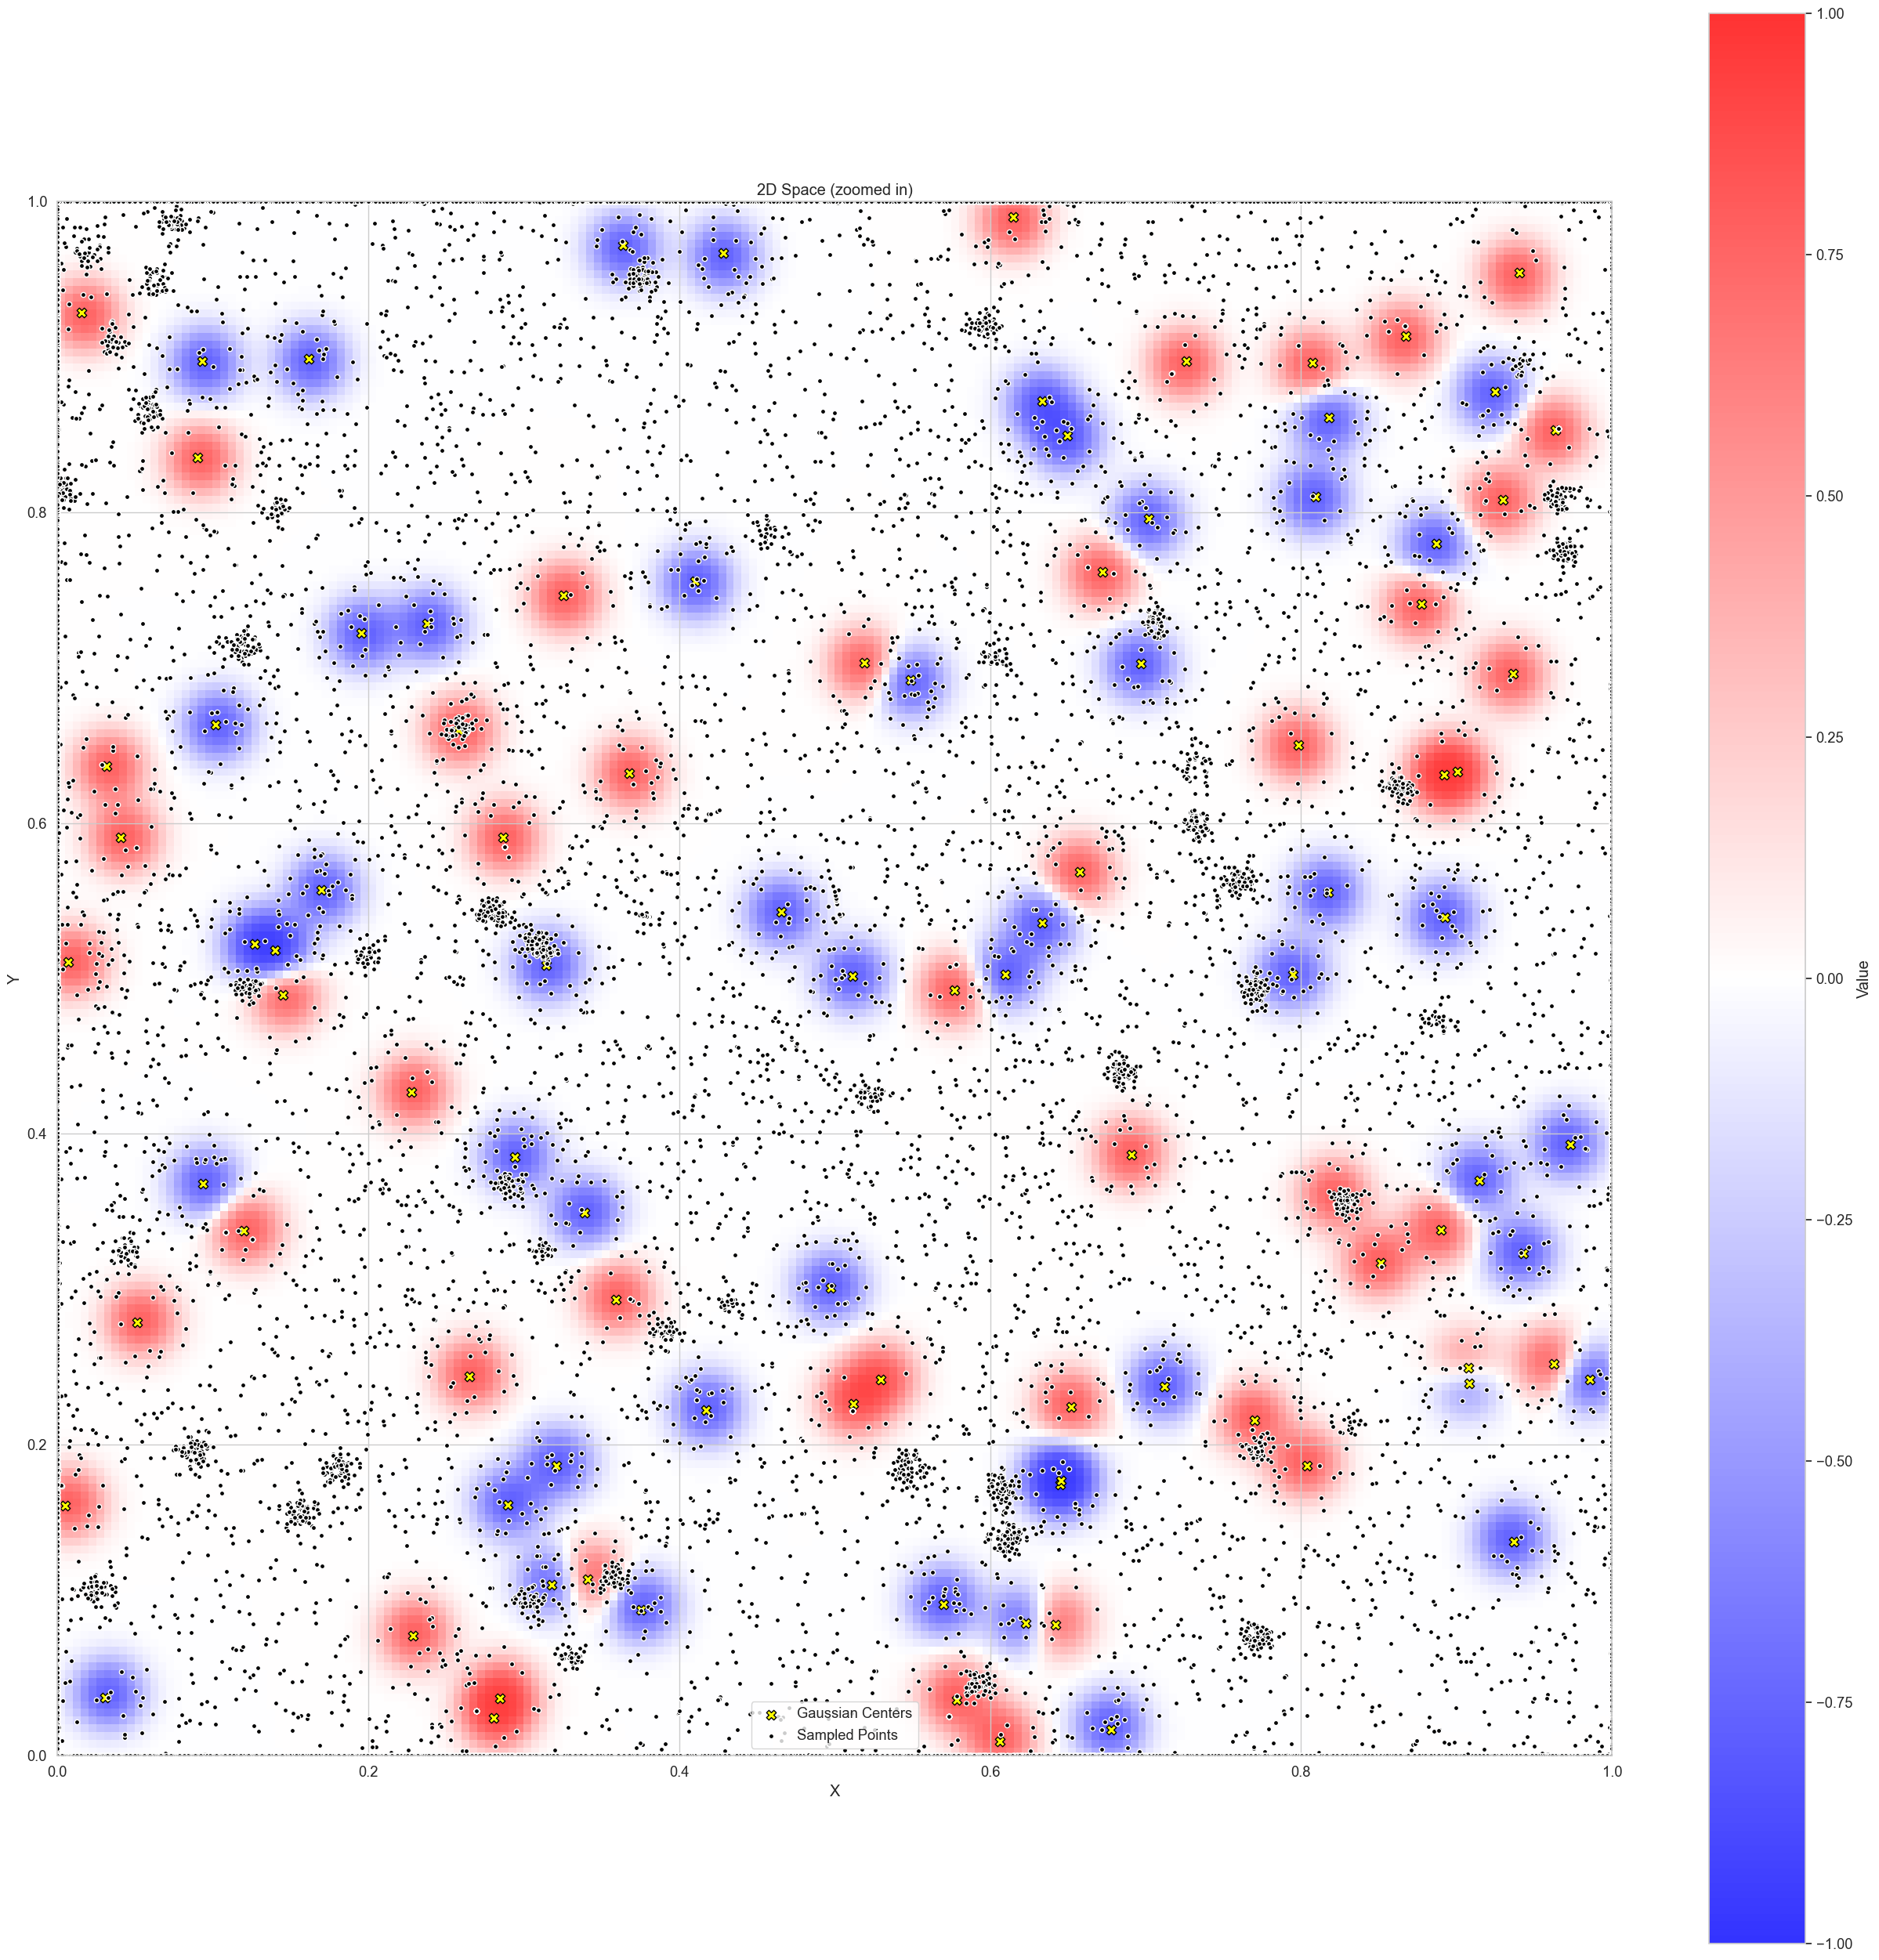

In [72]:
plot_histograms(balanced_projects, "../log/policy_balanced_area.pickle")

In [23]:
# Load projects list from JSON file
with open("../log/policy_careerist_heavy_projects.json", "r") as f:
    careerist_heavy_projects = json.load(f)

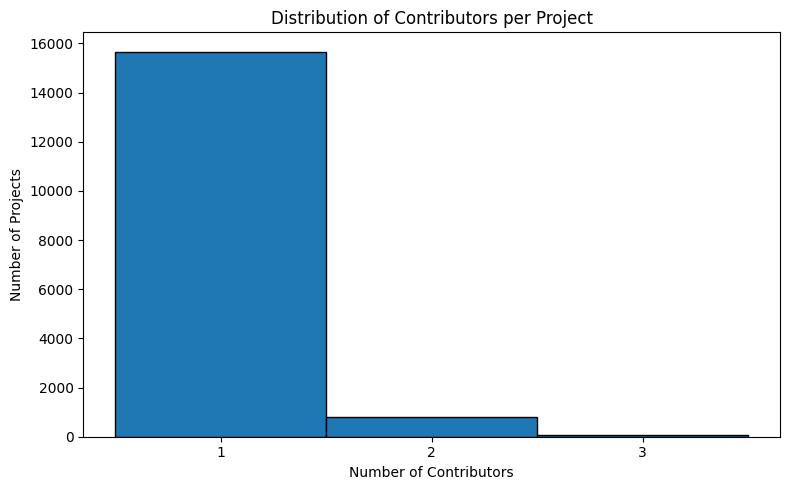

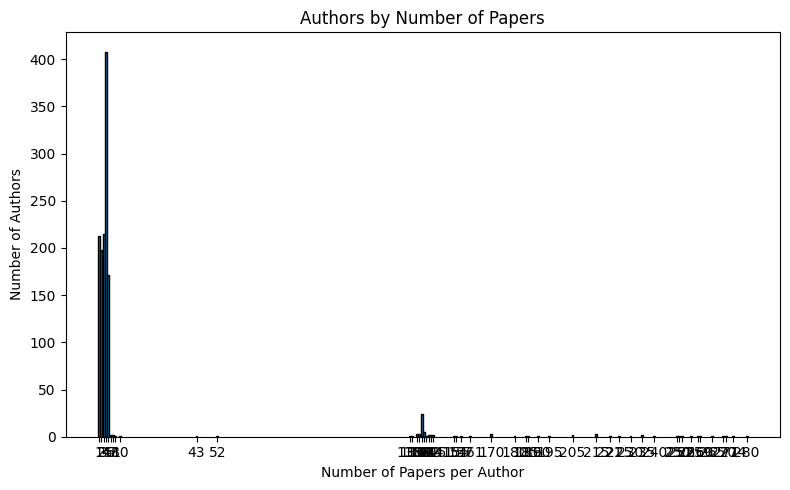

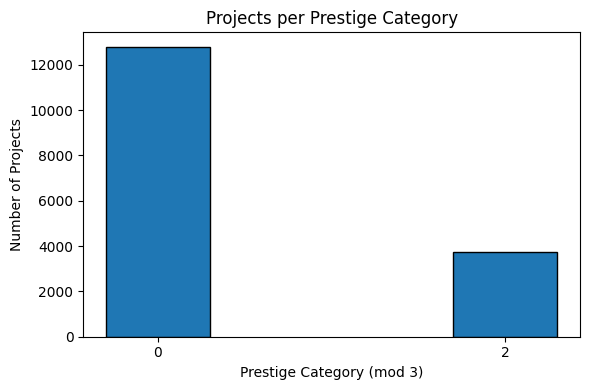

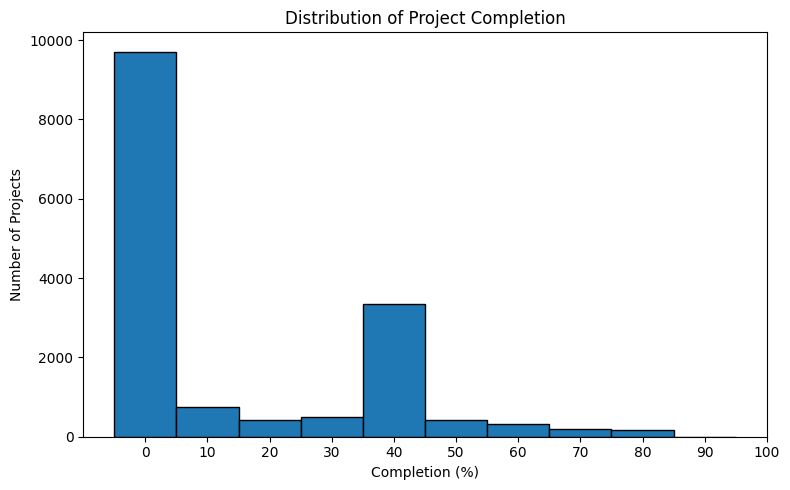

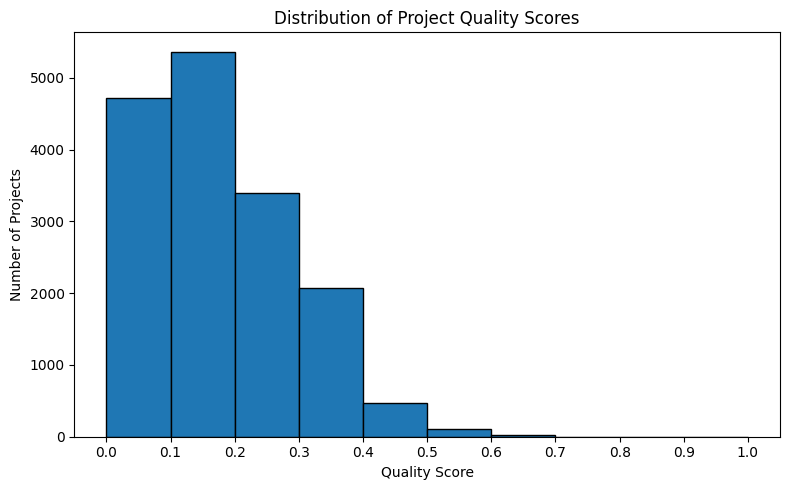

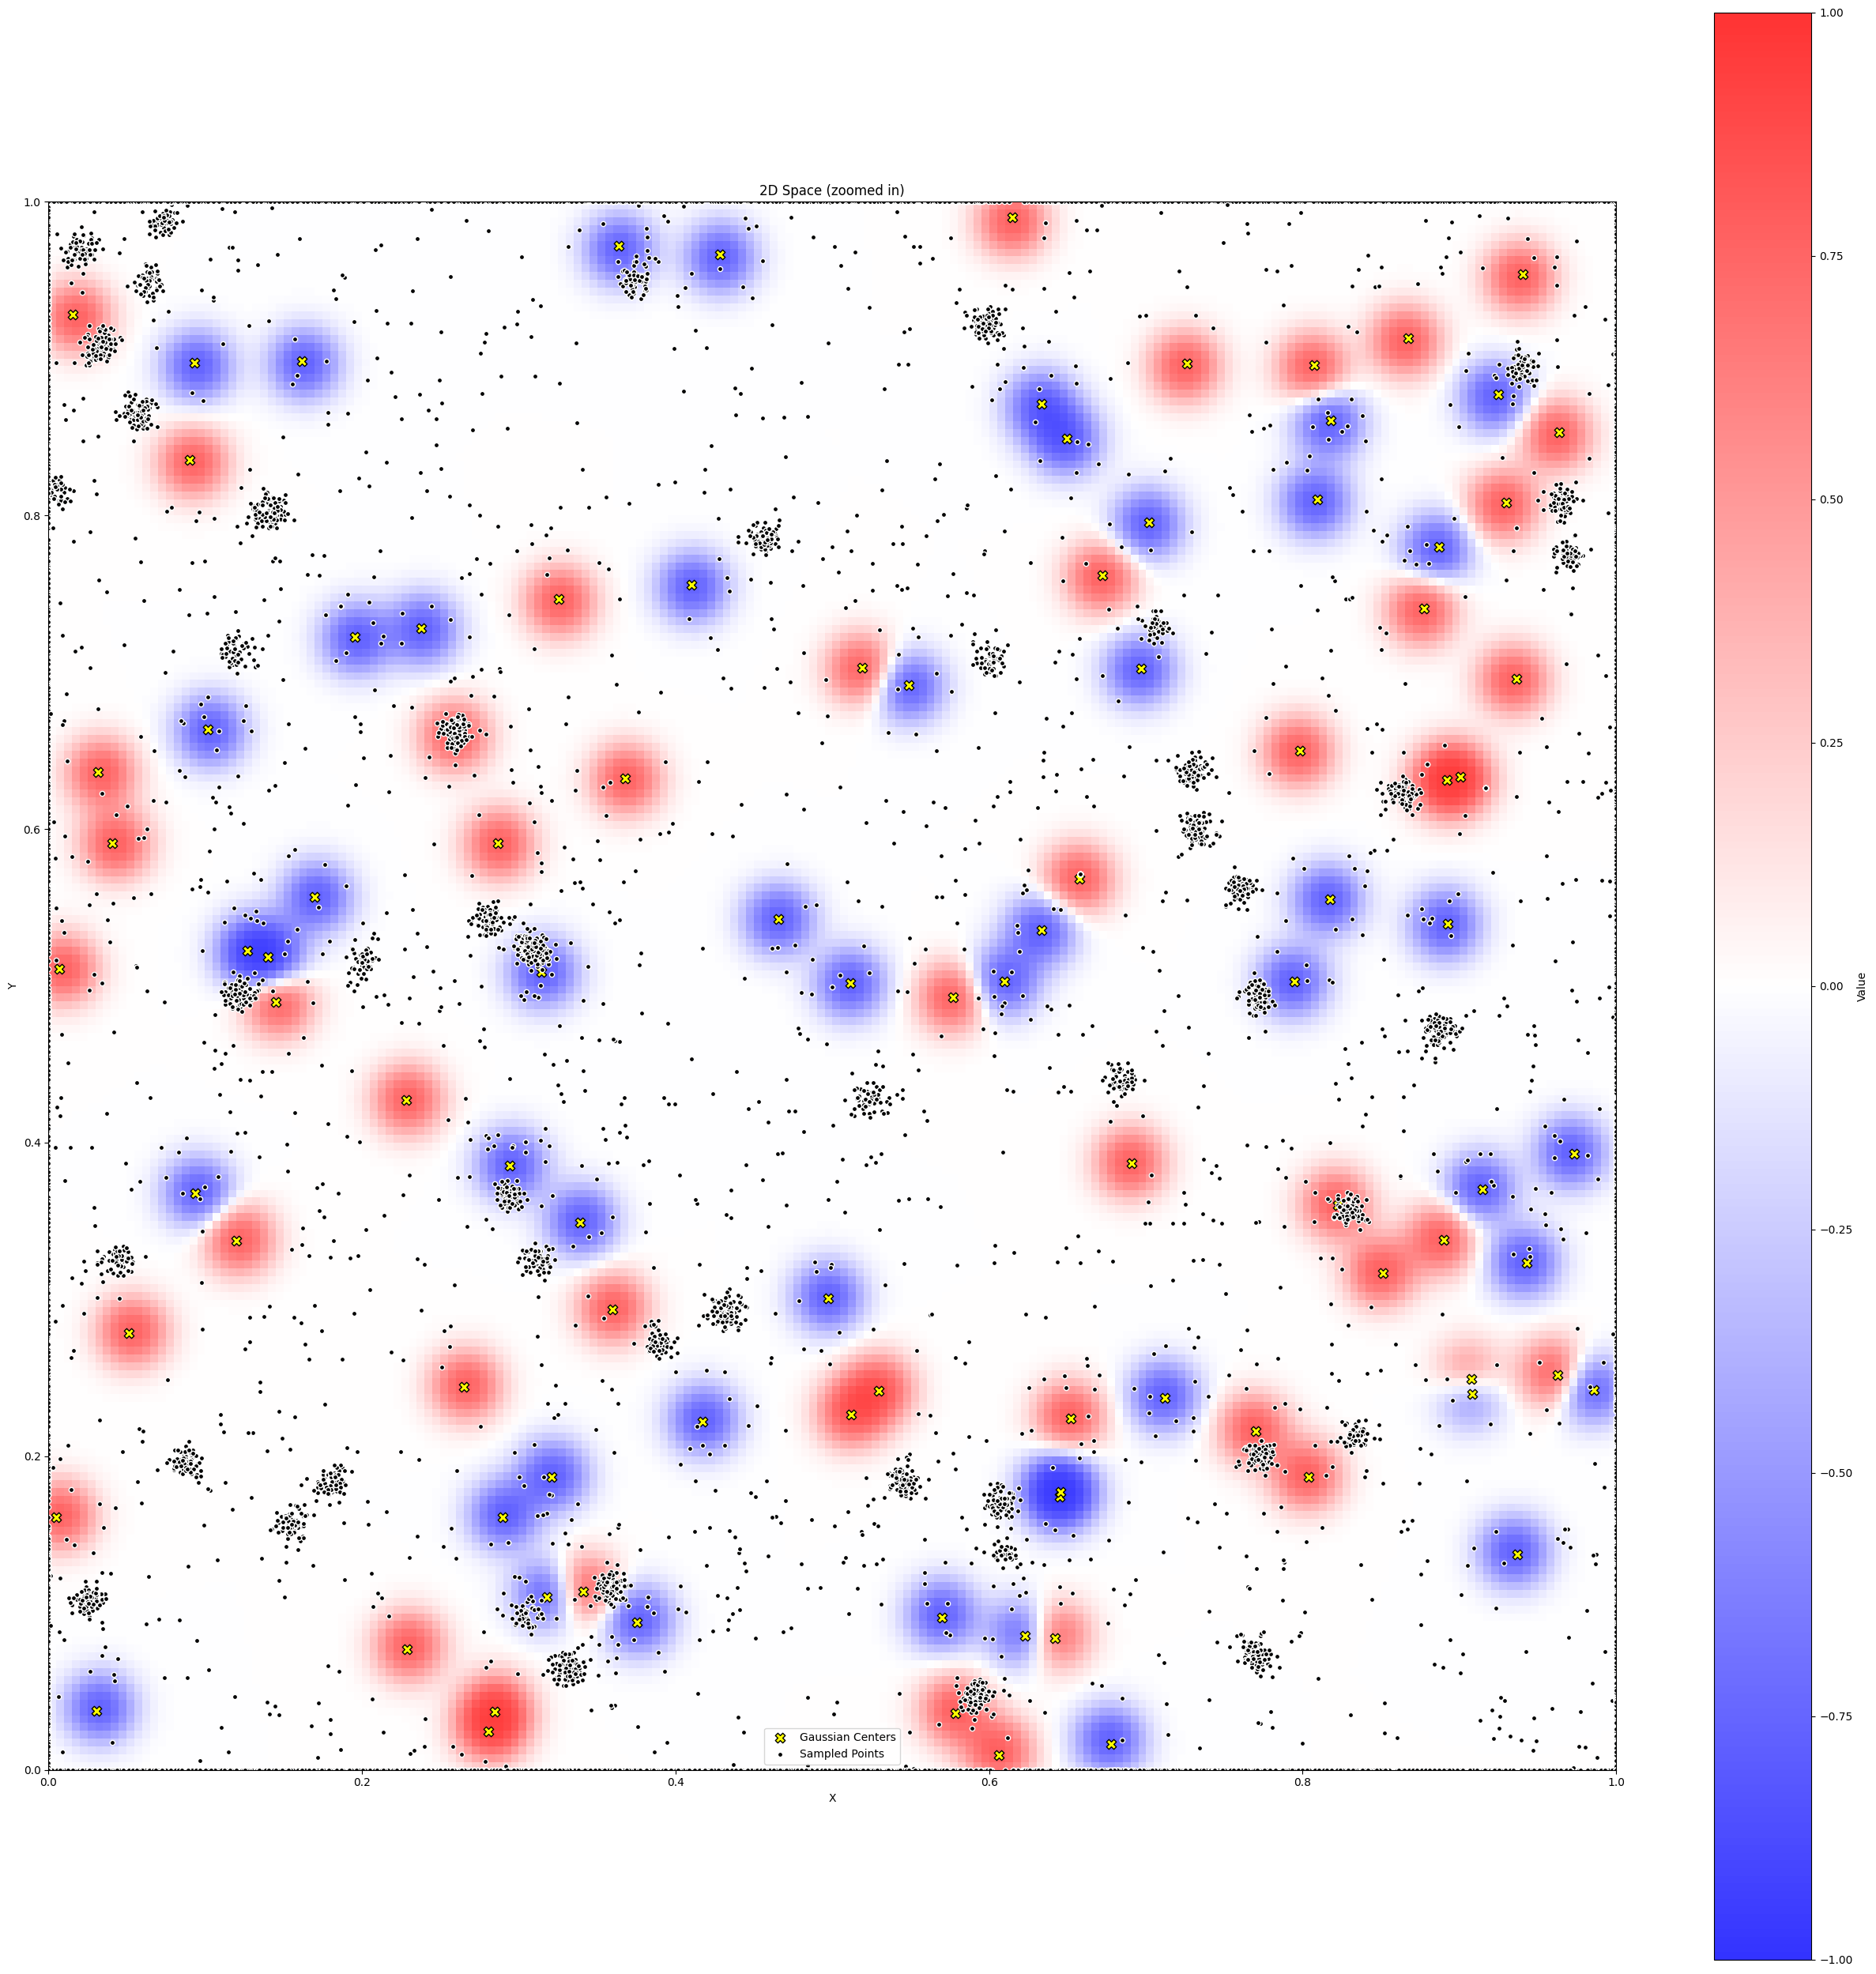

In [24]:
plot_histograms(careerist_heavy_projects, "../log/policy_careerist_heavy_area.pickle")

In [25]:
# Load projects list from JSON file
with open("../log/policy_orthodox_heavy_projects.json", "r") as f:
    orthodox_heavy_projects = json.load(f)

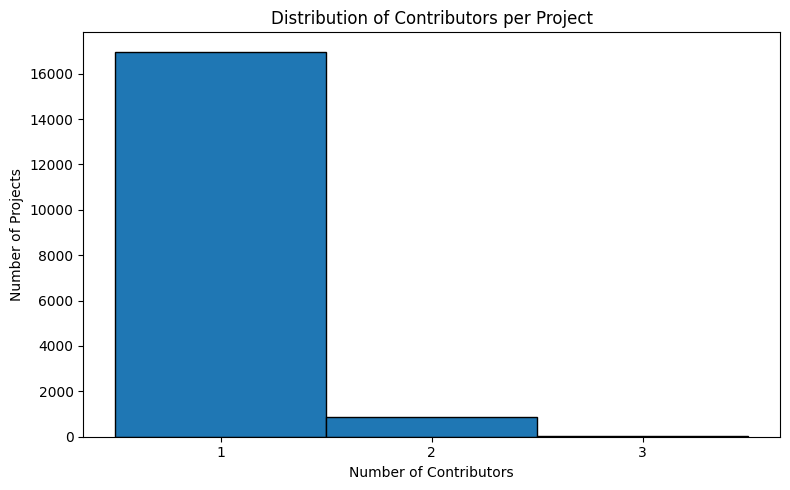

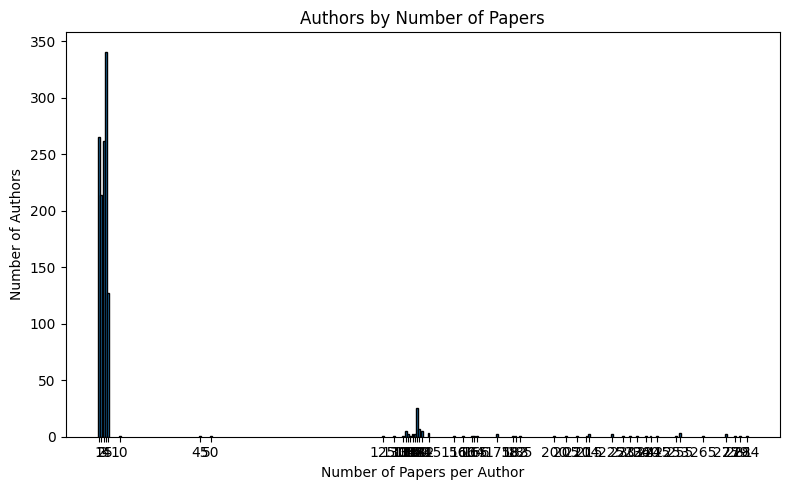

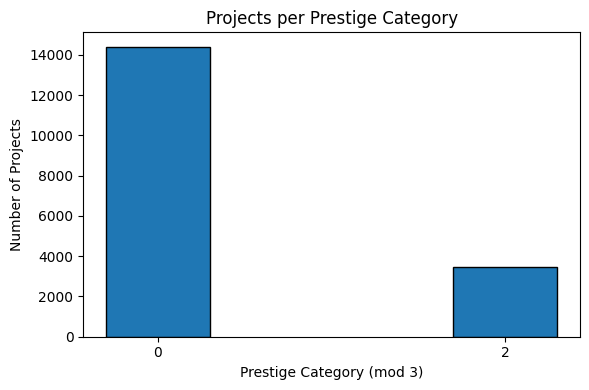

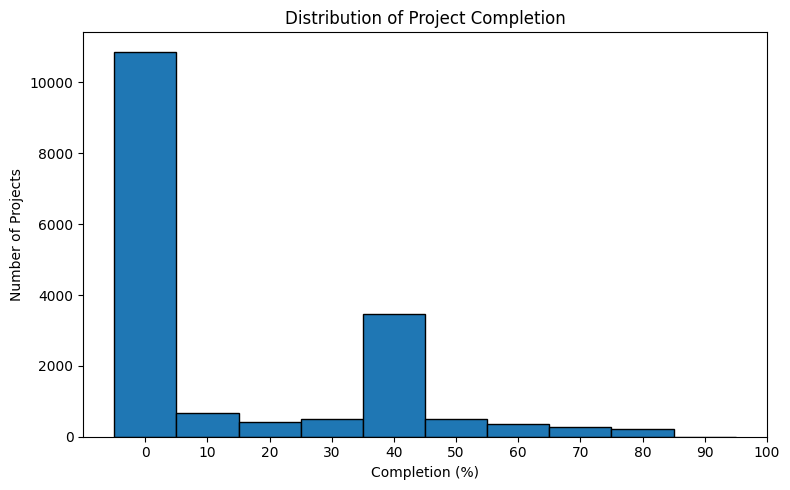

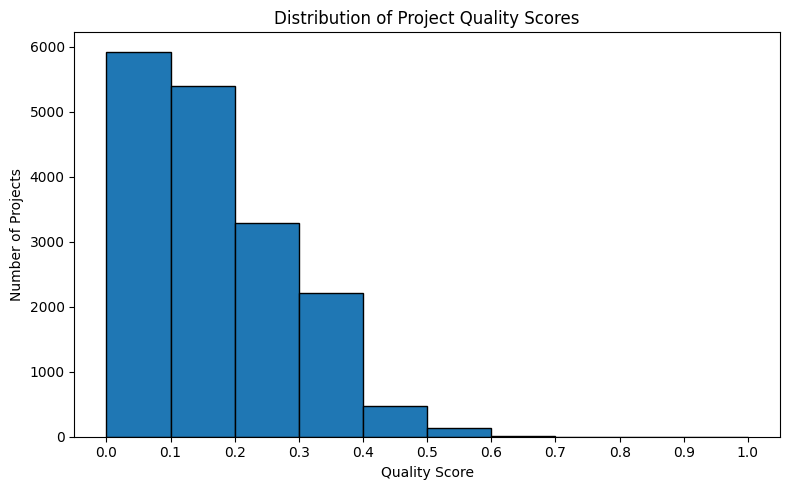

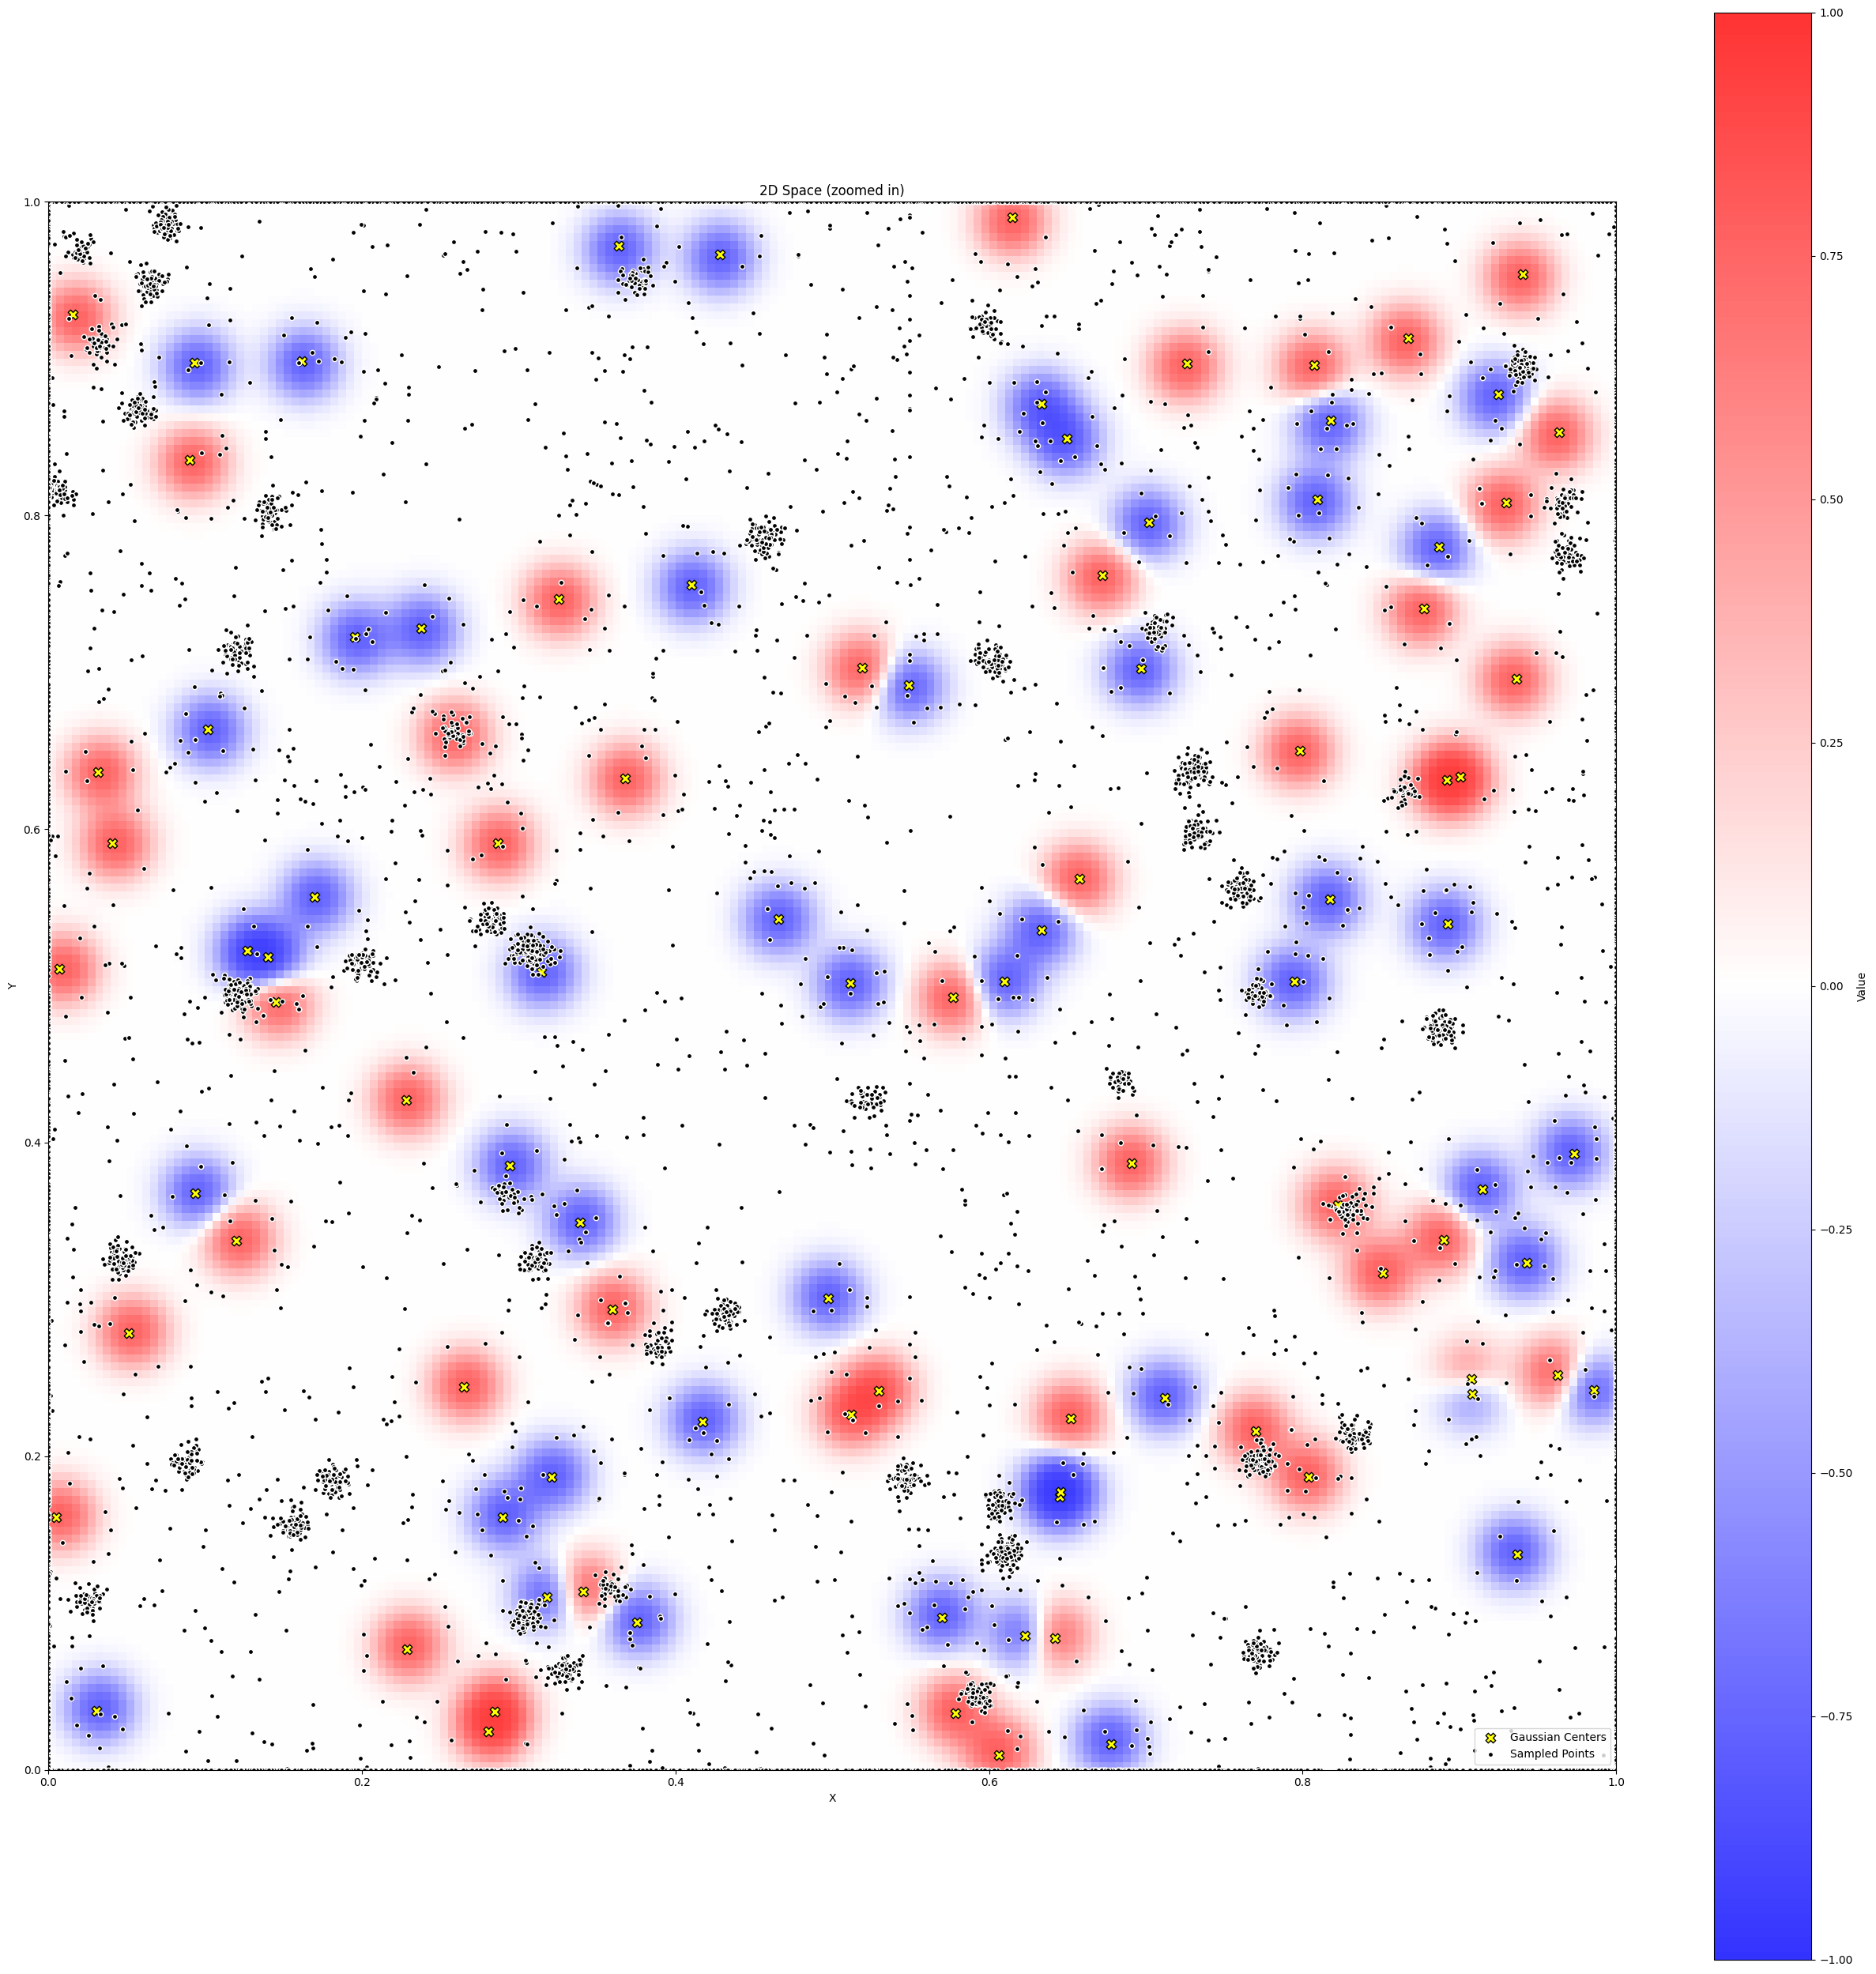

In [26]:
plot_histograms(orthodox_heavy_projects, "../log/policy_orthodox_heavy_area.pickle")

In [66]:
# Load projects list from JSON file
with open("../log/debug_sim_projects.json", "r") as f:
   debug_projects = json.load(f)


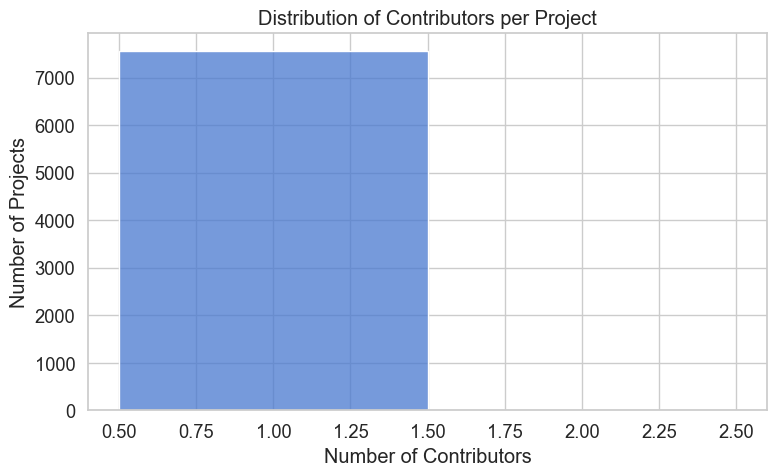

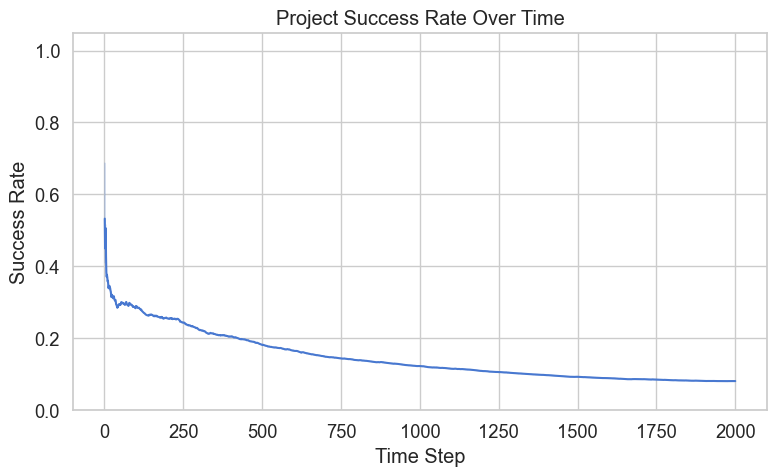

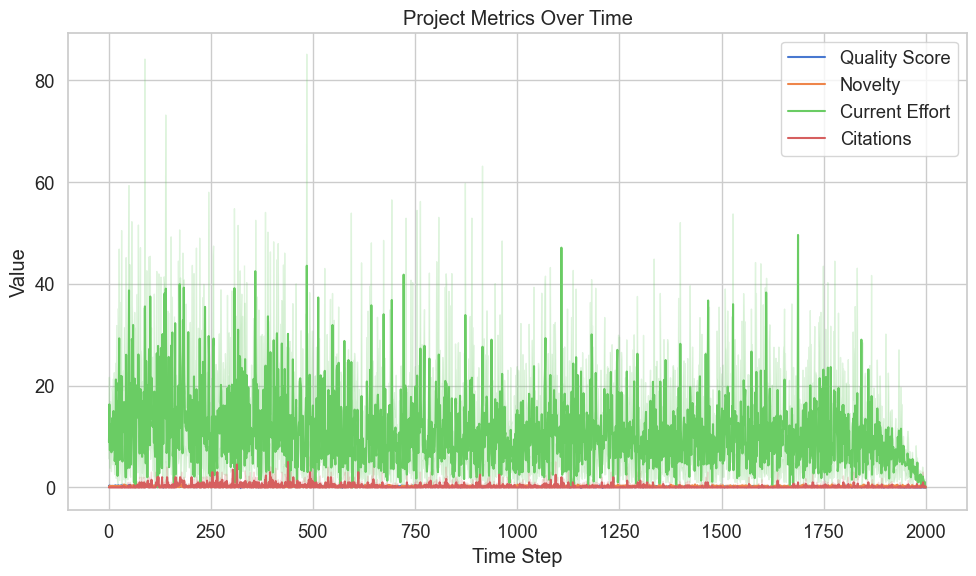

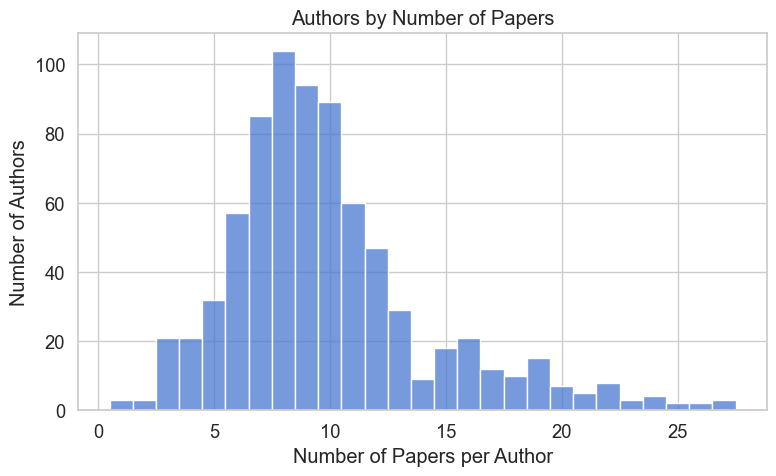

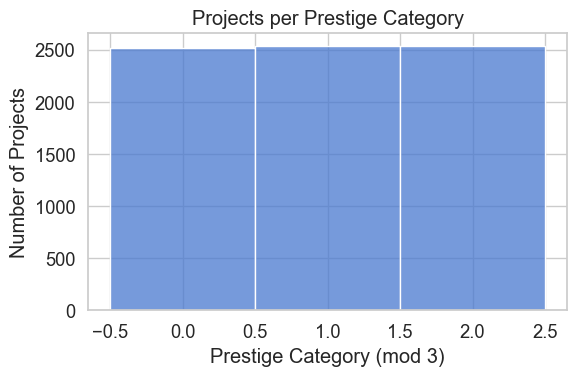

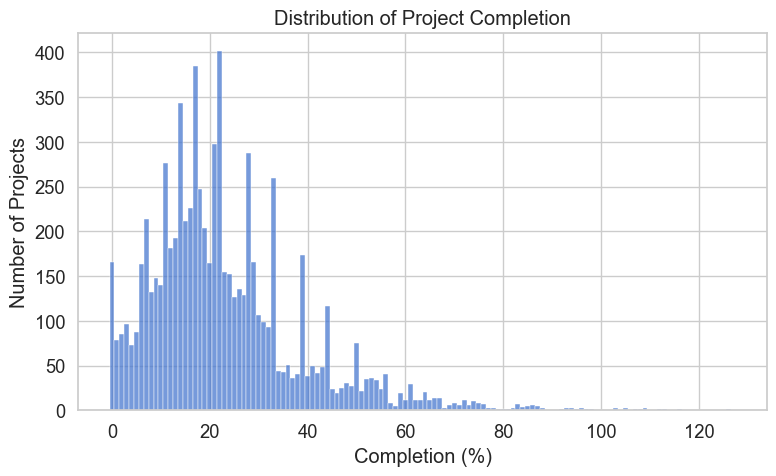

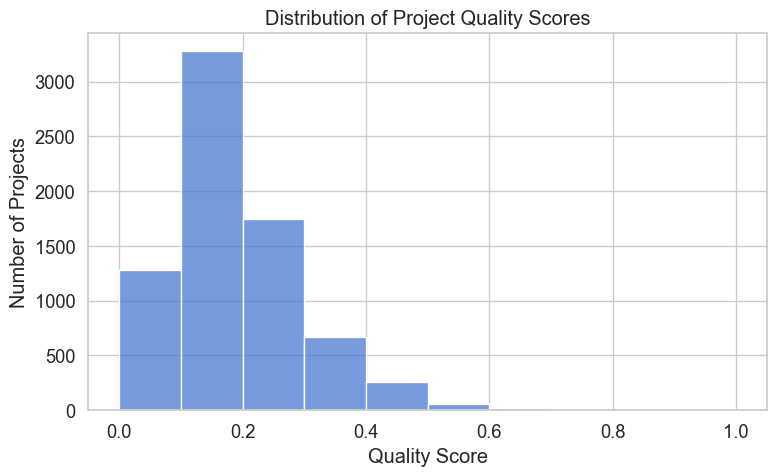

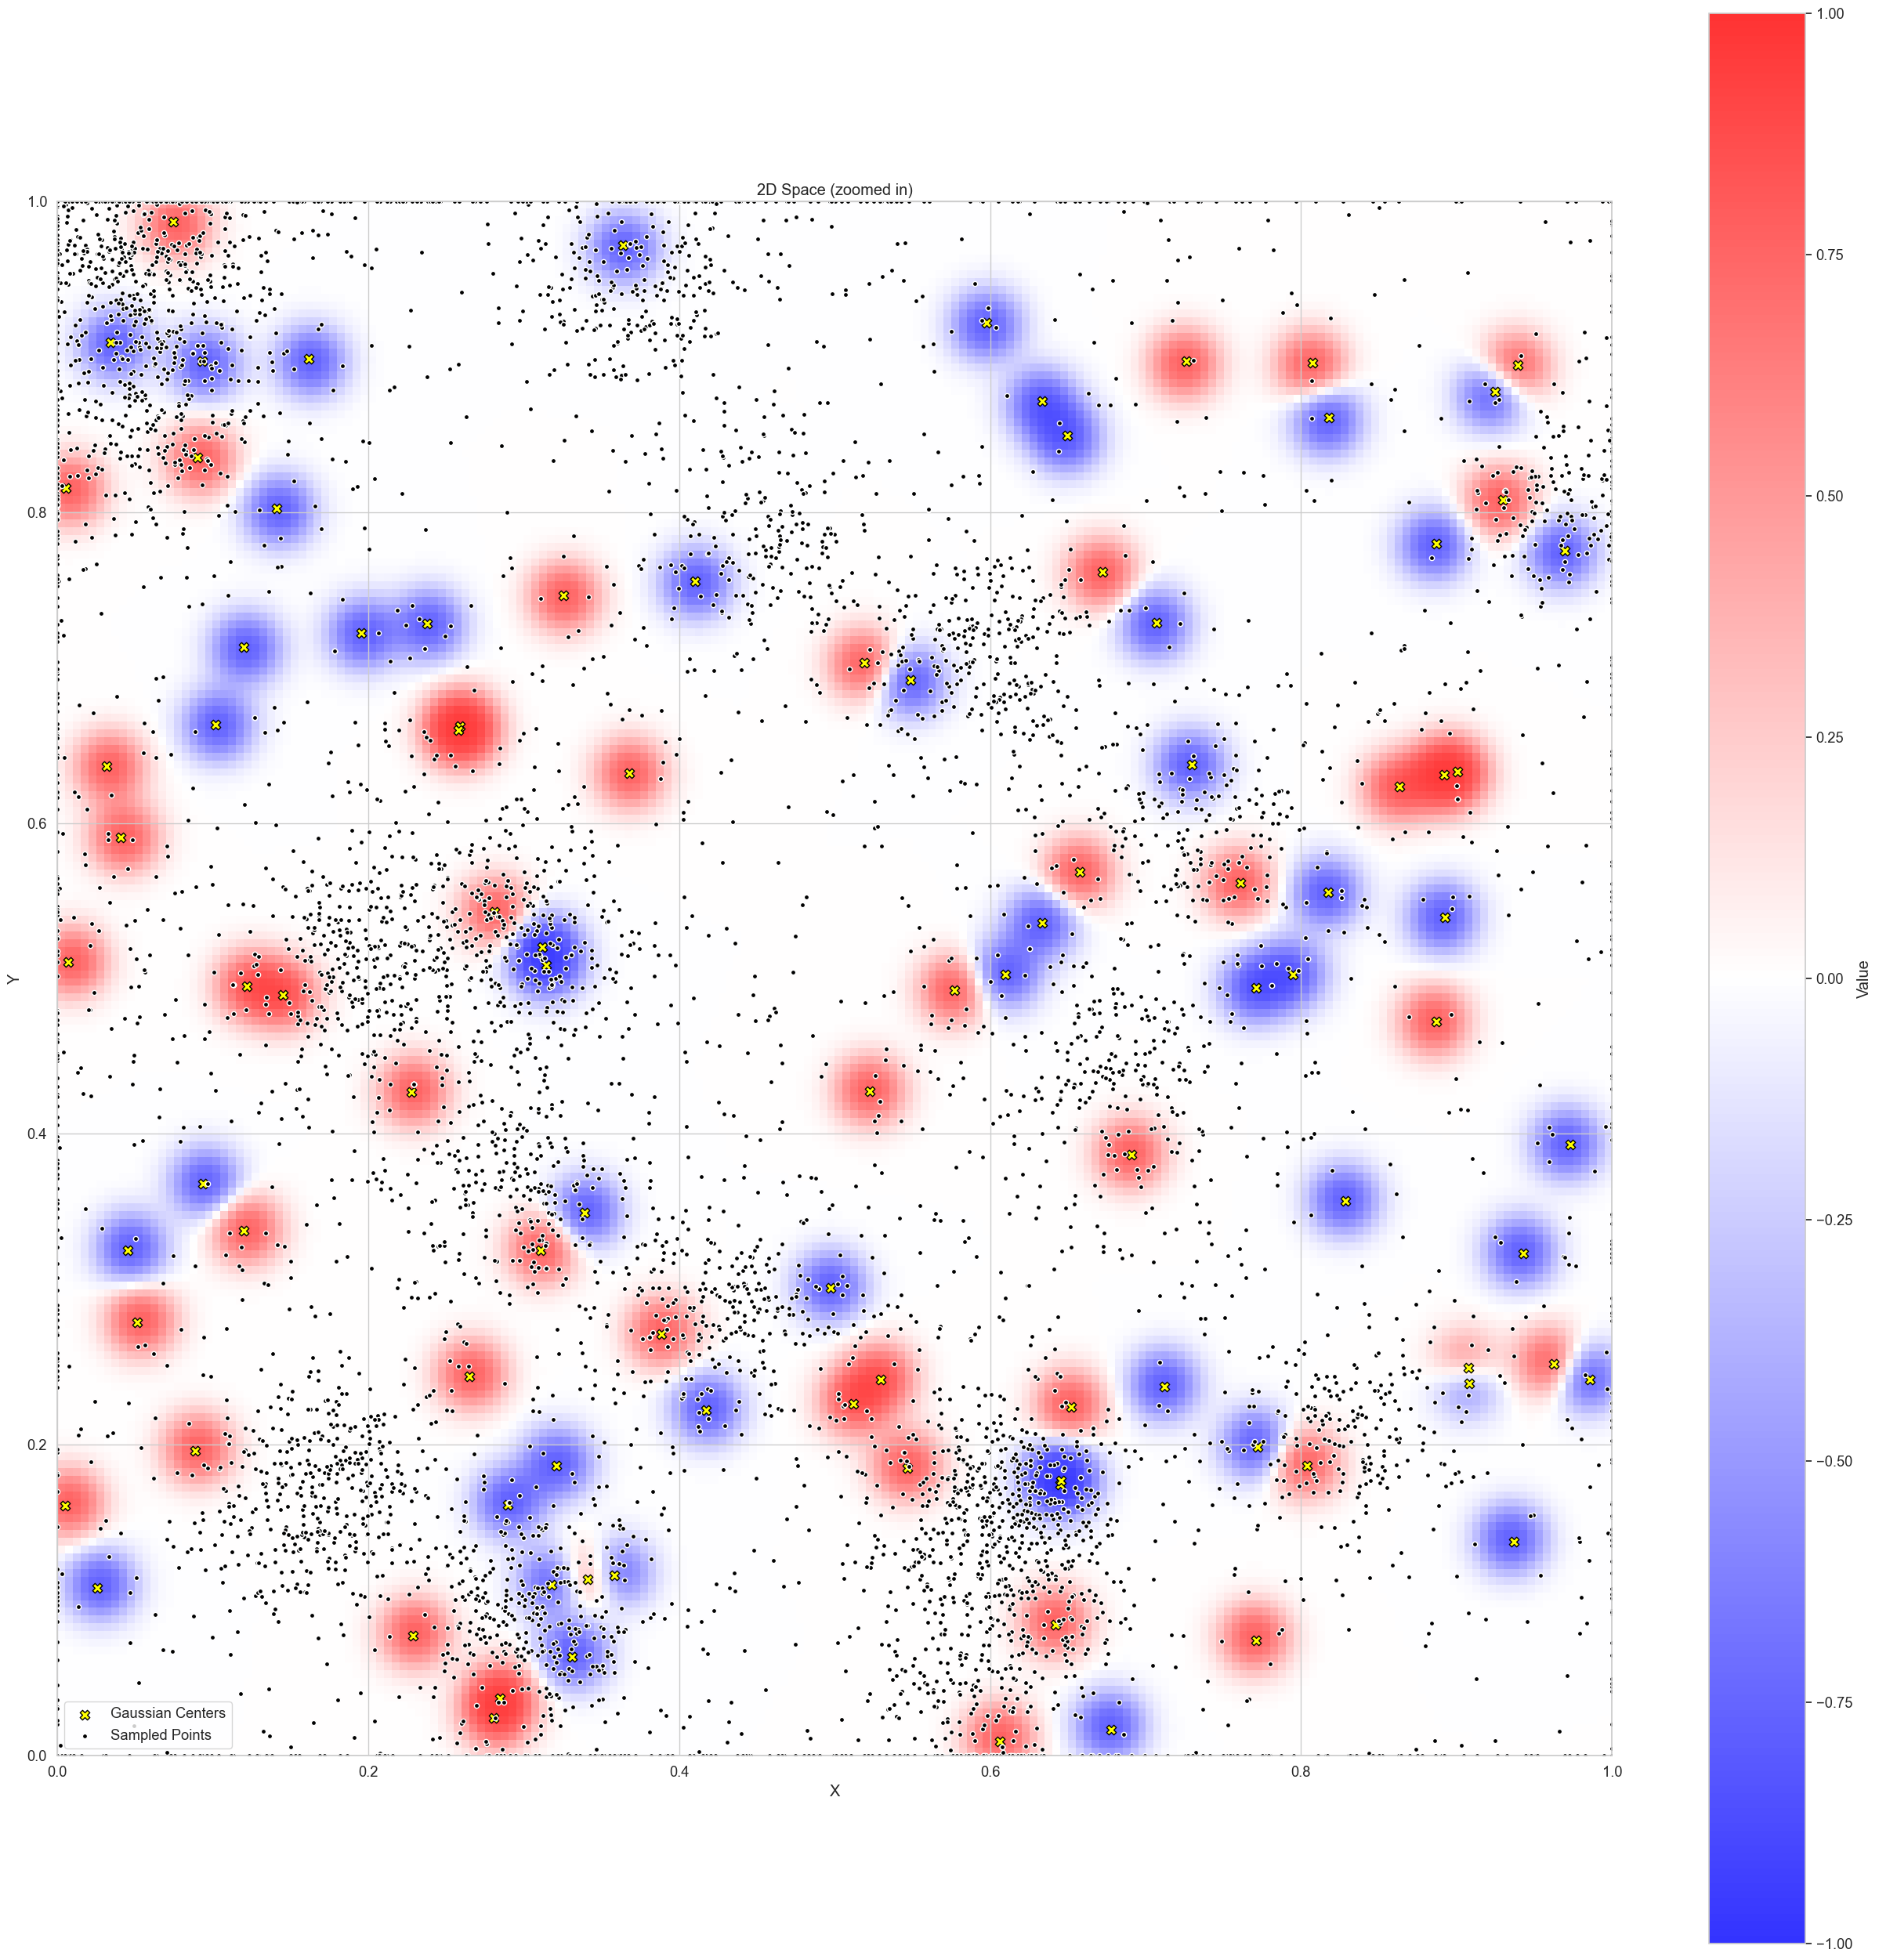

In [67]:
plot_histograms(debug_projects, "../log/debug_sim_actions.pickle")

In [36]:
# Load observations list from JSON file
debug_obs = []
with open("../log/debug_sim_observations.jsonl", "r") as f:
    for line in f.readlines():
        debug_obs.append(json.loads(line.strip()))

In [37]:
len(debug_obs)

2000

In [41]:
len([o for o in debug_obs[0] if o is not None])

100

In [43]:
debug_projects[0]

{'project_id': 'project_0-0-2',
 'required_effort': 10,
 'prestige': 0.5674199826197092,
 'time_window': 17.0,
 'peer_fit': [0.5],
 'novelty': 0.15719720446626628,
 'current_effort': 2.5,
 'contributors': [56],
 'start_time': 2,
 'finished': True,
 'final_reward': 0.5674199826197092,
 'kene': [0.7255010198507128, 0.3321562430825309],
 'citations': [],
 'cited_by': ['project_321-1-83', 'project_344-1-89'],
 'generator_project_id': None,
 'validation_noise': 0.9096565504085111,
 'quality_score': 0.5130251799547344}